### The Data
This book builds on previous notebooks regarding feature enginnering and feature selection however in this book we will train a model per 1JHC and 1JHN coupling types. We will additionally feature enhance those datasets by more details about the eletronic structure of the molecules.

Note: this book will only consider data from the following csv files: train, structures and molecule_structures


In [1]:
import pandas as pd

input_folder = './input'

train = pd.read_csv(f'{input_folder}/train.csv')
structures = pd.read_csv(f'{input_folder}/structures.csv')
molecular_structures = pd.read_csv(f'{input_folder}/molecule_structures.csv')


In [2]:
f'Train shape: {train.shape}'

'Train shape: (4658147, 6)'

In [3]:
f'Structures shape: {structures.shape}'

'Structures shape: (2358657, 6)'

In [4]:
f'molecular structures shape: {molecular_structures.shape}'

'molecular structures shape: (1586325, 32)'

In [5]:
print(f"There are {train['type'].nunique()} unique coupling types: {train['type'].unique()}")

There are 8 unique coupling types: ['1JHC' '2JHH' '1JHN' '2JHN' '2JHC' '3JHH' '3JHC' '3JHN']


#### Merging training and structure data sources into one training data

Code for joining data is from this kernel: https://www.kaggle.com/seriousran/just-speed-up-calculate-distance-from-benchmark

In [6]:
def map_atom_info(df, atom_idx):
    df = pd.merge(df, structures, how = 'left',
                  left_on  = ['molecule_name', f'atom_index_{atom_idx}'],
                  right_on = ['molecule_name',  'atom_index'])
    
    df = df.drop('atom_index', axis=1)
    df = df.rename(columns={'atom': f'atom_{atom_idx}',
                            'x': f'x_{atom_idx}',
                            'y': f'y_{atom_idx}',
                            'z': f'z_{atom_idx}'})
    return df

In [7]:
train = map_atom_info(train, 0)
train = map_atom_info(train, 1)

In [8]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001


#### Merging new training and molecule_structures data sources into one training data

In [9]:
def map_molecule_info(df):
    df = pd.merge(df, molecular_structures, how = 'left',
                  left_on  = ['molecule_name', 'atom_index_0', 'atom_index_1'],
                  right_on = ['molecule_name',  'atom_0', 'atom_1'])
    
    df = df.drop('atom_0_y', axis=1)
    df = df.drop('atom_1_y', axis=1)
    df = df.drop('atom_1_1_level_NB', axis=1)
    df = df.drop('atom_1_2_level_NB', axis=1)
    
    df = df.rename(columns={'atom_0_x': 'atom_0',
                            'atom_1_x': 'atom_1'})
    return df

In [10]:
train = map_molecule_info(train)

In [11]:
print(train.shape)

(4658147, 41)


In [12]:
import pandas

pandas.set_option('display.max_columns', None)

train.head(10)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,atom_0_CH3,atom_1_CH3,atom_0_CH2,atom_1_CH2,atom_0_CH1,atom_1_CH1,atom_0_CH0,atom_1_CH0,atom_0_NH2,atom_1_NH2,atom_0_NH1,atom_1_NH1,atom_0_NH0,atom_1_NH0,atom_0_OH1,atom_1_OH1,atom_0_OH0,atom_1_OH0,is_in_ring,has_aromatic_bond,is_primary_amide,is_secondary_amide,is_tertiary_amide,is_ester,is_carbonyl,bond_order,bond_length
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.091953
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.091952
5,5,dsgdb9nsd_000001,2,3,2JHH,-11.2541,H,1.011731,1.463751,0.000277,H,-0.540815,1.447527,-0.876644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,dsgdb9nsd_000001,2,4,2JHH,-11.2548,H,1.011731,1.463751,0.000277,H,-0.523814,1.437933,0.906397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,dsgdb9nsd_000001,3,0,1JHC,84.8093,H,-0.540815,1.447527,-0.876644,C,-0.012698,1.085804,0.008001,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.091946
8,8,dsgdb9nsd_000001,3,4,2JHH,-11.2543,H,-0.540815,1.447527,-0.876644,H,-0.523814,1.437933,0.906397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,dsgdb9nsd_000001,4,0,1JHC,84.8095,H,-0.523814,1.437933,0.906397,C,-0.012698,1.085804,0.008001,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.091948


In [13]:
import numpy as np

train.iloc[:,14:40] = train.iloc[:,14:40].fillna(0.0).astype(np.int8)
train.iloc[:,2:4] = train.iloc[:,2:4].astype(np.int8)
train.head()


,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,atom_0_CH3,atom_1_CH3,atom_0_CH2,atom_1_CH2,atom_0_CH1,atom_1_CH1,atom_0_CH0,atom_1_CH0,atom_0_NH2,atom_1_NH2,atom_0_NH1,atom_1_NH1,atom_0_NH0,atom_1_NH0,atom_0_OH1,atom_1_OH1,atom_0_OH0,atom_1_OH0,is_in_ring,has_aromatic_bond,is_primary_amide,is_secondary_amide,is_tertiary_amide,is_ester,is_carbonyl,bond_order,bond_length
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.091953
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.091952


In [14]:
train.loc[train['molecule_name'] == 'dsgdb9nsd_000050']

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,atom_0_CH3,atom_1_CH3,atom_0_CH2,atom_1_CH2,atom_0_CH1,atom_1_CH1,atom_0_CH0,atom_1_CH0,atom_0_NH2,atom_1_NH2,atom_0_NH1,atom_1_NH1,atom_0_NH0,atom_1_NH0,atom_0_OH1,atom_1_OH1,atom_0_OH0,atom_1_OH0,is_in_ring,has_aromatic_bond,is_primary_amide,is_secondary_amide,is_tertiary_amide,is_ester,is_carbonyl,bond_order,bond_length
696,696,dsgdb9nsd_000050,5,0,1JHN,59.301000,H,-0.832432,1.927727,0.021230,N,-0.008297,1.353628,0.009960,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.004448
697,697,dsgdb9nsd_000050,5,1,2JHC,2.826250,H,-0.832432,1.927727,0.021230,C,1.280333,1.824574,-0.000225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
698,698,dsgdb9nsd_000050,5,2,3JHC,6.737830,H,-0.832432,1.927727,0.021230,C,2.122166,0.736989,-0.014456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
699,699,dsgdb9nsd_000050,5,3,3JHC,6.737890,H,-0.832432,1.927727,0.021230,C,1.308499,-0.431096,-0.012842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
700,700,dsgdb9nsd_000050,5,4,2JHC,2.826320,H,-0.832432,1.927727,0.021230,C,-0.003428,-0.018369,0.002357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
701,701,dsgdb9nsd_000050,5,6,3JHH,0.689723,H,-0.832432,1.927727,0.021230,H,1.484718,2.883126,0.003543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
702,702,dsgdb9nsd_000050,5,9,3JHH,0.689683,H,-0.832432,1.927727,0.021230,H,-0.925516,-0.576971,0.008394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
703,703,dsgdb9nsd_000050,6,0,2JHN,3.805590,H,1.484718,2.883126,0.003543,N,-0.008297,1.353628,0.009960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
704,704,dsgdb9nsd_000050,6,1,1JHC,125.638000,H,1.484718,2.883126,0.003543,C,1.280333,1.824574,-0.000225,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.078110
705,705,dsgdb9nsd_000050,6,2,2JHC,5.964290,H,1.484718,2.883126,0.003543,C,2.122166,0.736989,-0.014456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


### Basic Feature engineering
#### Distances between atoms

In [15]:
def add_distances(df):
    df['abs_dx']=(df['x_1']-df['x_0']).abs()
    #df['abs_dx']=df['abs_dx'].abs()
    df['abs_dy']=(df['y_1']-df['y_0']).abs()
    #df['abs_dx']=df['abs_dx'].abs()
    df['abs_dz']=(df['z_1']-df['z_0']).abs()
    #df['abs_dx']=df['abs_dx'].abs()
    #df['dx2']=df['dx']**2
    #df['dy2']=df['dy']**2
    #df['dz2']=df['dz']**2
    #df['distance']=(df['dx2'] + df['dy2'] + df['dz2'])**(1/2)
    return df

In [16]:
train=add_distances(train)

In [17]:
train = train.drop('id', axis=1)
train = train.drop('molecule_name', axis=1)

In [18]:
train.shape

(4658147, 42)

#### Let's split the data into different datasets based on coupling types

In [19]:
train_map={}
selected_types = ['1JHC', '1JHN']
for coupling_type, df_by_type in train.groupby('type'):
    df_by_type = df_by_type.drop('type', axis=1)
    if coupling_type in selected_types:
        train_map[coupling_type] = df_by_type

In [20]:
train_map.keys()

dict_keys(['1JHC', '1JHN'])

In [21]:
[df.shape for df in train_map.values()]

[(709416, 41), (43363, 41)]

### Data splitting

In [22]:
train_map['1JHC'].columns

Index(['atom_index_0', 'atom_index_1', 'scalar_coupling_constant', 'atom_0',
       'x_0', 'y_0', 'z_0', 'atom_1', 'x_1', 'y_1', 'z_1', 'atom_0_CH3',
       'atom_1_CH3', 'atom_0_CH2', 'atom_1_CH2', 'atom_0_CH1', 'atom_1_CH1',
       'atom_0_CH0', 'atom_1_CH0', 'atom_0_NH2', 'atom_1_NH2', 'atom_0_NH1',
       'atom_1_NH1', 'atom_0_NH0', 'atom_1_NH0', 'atom_0_OH1', 'atom_1_OH1',
       'atom_0_OH0', 'atom_1_OH0', 'is_in_ring', 'has_aromatic_bond',
       'is_primary_amide', 'is_secondary_amide', 'is_tertiary_amide',
       'is_ester', 'is_carbonyl', 'bond_order', 'bond_length', 'abs_dx',
       'abs_dy', 'abs_dz'],
      dtype='object')

In [23]:
from sklearn.model_selection import train_test_split

train_map_split = {}
for key, dataset in train_map.items():
    y = dataset['scalar_coupling_constant']
    X = dataset.drop('scalar_coupling_constant', axis=1)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 13, test_size = 0.25)
    train_map_split[key] = (X_train, X_valid, y_train, y_valid)

In [24]:
train_map_split['1JHC'][0].head()

,atom_index_0,atom_index_1,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,atom_0_CH3,atom_1_CH3,atom_0_CH2,atom_1_CH2,atom_0_CH1,atom_1_CH1,atom_0_CH0,atom_1_CH0,atom_0_NH2,atom_1_NH2,atom_0_NH1,atom_1_NH1,atom_0_NH0,atom_1_NH0,atom_0_OH1,atom_1_OH1,atom_0_OH0,atom_1_OH0,is_in_ring,has_aromatic_bond,is_primary_amide,is_secondary_amide,is_tertiary_amide,is_ester,is_carbonyl,bond_order,bond_length,abs_dx,abs_dy,abs_dz
2662234,17,6,H,-0.848313,-0.722608,2.695692,C,0.181974,-0.355070,2.639212,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.095338,1.030287,0.367538,0.056480
1861995,21,6,H,1.680221,-2.124947,-3.178018,C,2.009854,-2.357947,-2.154981,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.099796,0.329633,0.233000,1.023037
1413733,14,6,H,3.378742,3.861877,0.385266,C,2.536057,3.249472,0.708234,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.090627,0.842685,0.612405,0.322967
121298,10,0,H,-0.583418,1.810196,0.852186,C,0.004972,1.360666,0.046756,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.094074,0.588390,0.449531,0.805430
4643406,11,0,H,0.440245,1.771128,1.077663,C,0.017357,1.434540,0.123716,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.096422,0.422888,0.336588,0.953947


#### Cleanup - we need the resources

In [25]:
import gc

del train
del structures
del molecular_structures

for key, dataset in train_map.items():
    del dataset
train_map.clear()

gc.collect()

68

### The model

In [26]:
from catboost import CatBoostRegressor

cat_features_index = np.where(train_map_split['1JHC'][0].dtypes != float)[0]

model_map = {}
for key, datasets in train_map_split.items():
    f'Training model on coupling type: {key}'

    model = CatBoostRegressor(iterations=3000, depth= 13, random_seed = 23, task_type = "GPU", devices='0')
    model.fit(datasets[0], datasets[2], eval_set=(datasets[1], datasets[3]), cat_features=cat_features_index, logging_level='Verbose')
    model_map[key] = model

0:	learn: 93.8379327	test: 93.8403015	best: 93.8403015 (0)	total: 180ms	remaining: 9m
1:	learn: 91.0467843	test: 91.0494821	best: 91.0494821 (1)	total: 246ms	remaining: 6m 8s
2:	learn: 88.3385178	test: 88.3399707	best: 88.3399707 (2)	total: 420ms	remaining: 7m
3:	learn: 85.7135574	test: 85.7154449	best: 85.7154449 (3)	total: 561ms	remaining: 7m
4:	learn: 83.1692157	test: 83.1699056	best: 83.1699056 (4)	total: 743ms	remaining: 7m 25s
5:	learn: 80.7081334	test: 80.7075134	best: 80.7075134 (5)	total: 891ms	remaining: 7m 24s
6:	learn: 78.3133468	test: 78.3124099	best: 78.3124099 (6)	total: 931ms	remaining: 6m 38s
7:	learn: 75.9949608	test: 75.9938165	best: 75.9938165 (7)	total: 1.09s	remaining: 6m 49s
8:	learn: 73.7464475	test: 73.7430295	best: 73.7430295 (8)	total: 1.27s	remaining: 7m 1s
9:	learn: 71.5608521	test: 71.5550175	best: 71.5550175 (9)	total: 1.5s	remaining: 7m 27s
10:	learn: 69.4408973	test: 69.4347433	best: 69.4347433 (10)	total: 1.56s	remaining: 7m 3s
11:	learn: 67.3931275	te

91:	learn: 8.8202259	test: 8.8134266	best: 8.8134266 (91)	total: 14.4s	remaining: 7m 34s
92:	learn: 8.6974115	test: 8.6911771	best: 8.6911771 (92)	total: 14.5s	remaining: 7m 34s
93:	learn: 8.5785378	test: 8.5733588	best: 8.5733588 (93)	total: 14.7s	remaining: 7m 34s
94:	learn: 8.4669436	test: 8.4624948	best: 8.4624948 (94)	total: 14.9s	remaining: 7m 34s
95:	learn: 8.3594662	test: 8.3561145	best: 8.3561145 (95)	total: 15s	remaining: 7m 34s
96:	learn: 8.2566147	test: 8.2534662	best: 8.2534662 (96)	total: 15.2s	remaining: 7m 34s
97:	learn: 8.1571324	test: 8.1549568	best: 8.1549568 (97)	total: 15.4s	remaining: 7m 34s
98:	learn: 8.0648713	test: 8.0633553	best: 8.0633553 (98)	total: 15.5s	remaining: 7m 34s
99:	learn: 7.9762773	test: 7.9755026	best: 7.9755026 (99)	total: 15.7s	remaining: 7m 34s
100:	learn: 7.8917377	test: 7.8913491	best: 7.8913491 (100)	total: 15.8s	remaining: 7m 34s
101:	learn: 7.8084557	test: 7.8088523	best: 7.8088523 (101)	total: 16s	remaining: 7m 33s
102:	learn: 7.7293027

183:	learn: 6.0576663	test: 6.1109510	best: 6.1109510 (183)	total: 28.9s	remaining: 7m 22s
184:	learn: 6.0533564	test: 6.1070704	best: 6.1070704 (184)	total: 29.1s	remaining: 7m 22s
185:	learn: 6.0501613	test: 6.1042889	best: 6.1042889 (185)	total: 29.2s	remaining: 7m 22s
186:	learn: 6.0463724	test: 6.1010842	best: 6.1010842 (186)	total: 29.4s	remaining: 7m 21s
187:	learn: 6.0431577	test: 6.0981433	best: 6.0981433 (187)	total: 29.5s	remaining: 7m 21s
188:	learn: 6.0392443	test: 6.0949974	best: 6.0949974 (188)	total: 29.7s	remaining: 7m 21s
189:	learn: 6.0363649	test: 6.0923228	best: 6.0923228 (189)	total: 29.8s	remaining: 7m 21s
190:	learn: 6.0329336	test: 6.0893936	best: 6.0893936 (190)	total: 30s	remaining: 7m 21s
191:	learn: 6.0278005	test: 6.0847709	best: 6.0847709 (191)	total: 30.1s	remaining: 7m 20s
192:	learn: 6.0240689	test: 6.0810694	best: 6.0810694 (192)	total: 30.3s	remaining: 7m 20s
193:	learn: 6.0204524	test: 6.0778294	best: 6.0778294 (193)	total: 30.5s	remaining: 7m 20s
1

275:	learn: 5.7664417	test: 5.8715328	best: 5.8715328 (275)	total: 43.8s	remaining: 7m 12s
276:	learn: 5.7630562	test: 5.8688047	best: 5.8688047 (276)	total: 43.9s	remaining: 7m 11s
277:	learn: 5.7614094	test: 5.8670979	best: 5.8670979 (277)	total: 44.1s	remaining: 7m 11s
278:	learn: 5.7589394	test: 5.8651606	best: 5.8651606 (278)	total: 44.3s	remaining: 7m 11s
279:	learn: 5.7568422	test: 5.8634119	best: 5.8634119 (279)	total: 44.4s	remaining: 7m 11s
280:	learn: 5.7538319	test: 5.8608328	best: 5.8608328 (280)	total: 44.6s	remaining: 7m 11s
281:	learn: 5.7517008	test: 5.8592918	best: 5.8592918 (281)	total: 44.7s	remaining: 7m 10s
282:	learn: 5.7500928	test: 5.8581564	best: 5.8581564 (282)	total: 44.9s	remaining: 7m 10s
283:	learn: 5.7484655	test: 5.8567864	best: 5.8567864 (283)	total: 45.1s	remaining: 7m 10s
284:	learn: 5.7462693	test: 5.8547489	best: 5.8547489 (284)	total: 45.2s	remaining: 7m 10s
285:	learn: 5.7430892	test: 5.8522676	best: 5.8522676 (285)	total: 45.4s	remaining: 7m 10s

368:	learn: 5.5732144	test: 5.7271222	best: 5.7271222 (368)	total: 58.9s	remaining: 7m
369:	learn: 5.5707298	test: 5.7253756	best: 5.7253756 (369)	total: 59.1s	remaining: 7m
370:	learn: 5.5693846	test: 5.7245269	best: 5.7245269 (370)	total: 59.3s	remaining: 6m 59s
371:	learn: 5.5670093	test: 5.7225645	best: 5.7225645 (371)	total: 59.4s	remaining: 6m 59s
372:	learn: 5.5648494	test: 5.7209065	best: 5.7209065 (372)	total: 59.6s	remaining: 6m 59s
373:	learn: 5.5632905	test: 5.7197143	best: 5.7197143 (373)	total: 59.8s	remaining: 6m 59s
374:	learn: 5.5615051	test: 5.7182786	best: 5.7182786 (374)	total: 59.9s	remaining: 6m 59s
375:	learn: 5.5583708	test: 5.7160571	best: 5.7160571 (375)	total: 1m	remaining: 6m 59s
376:	learn: 5.5568197	test: 5.7148570	best: 5.7148570 (376)	total: 1m	remaining: 6m 59s
377:	learn: 5.5554722	test: 5.7139603	best: 5.7139603 (377)	total: 1m	remaining: 6m 59s
378:	learn: 5.5535804	test: 5.7127383	best: 5.7127383 (378)	total: 1m	remaining: 6m 58s
379:	learn: 5.55209

460:	learn: 5.4154729	test: 5.6182193	best: 5.6182193 (460)	total: 1m 13s	remaining: 6m 47s
461:	learn: 5.4142397	test: 5.6174221	best: 5.6174221 (461)	total: 1m 14s	remaining: 6m 47s
462:	learn: 5.4130472	test: 5.6165350	best: 5.6165350 (462)	total: 1m 14s	remaining: 6m 46s
463:	learn: 5.4114581	test: 5.6154394	best: 5.6154394 (463)	total: 1m 14s	remaining: 6m 46s
464:	learn: 5.4096870	test: 5.6142587	best: 5.6142587 (464)	total: 1m 14s	remaining: 6m 46s
465:	learn: 5.4083435	test: 5.6131742	best: 5.6131742 (465)	total: 1m 14s	remaining: 6m 46s
466:	learn: 5.4069877	test: 5.6121890	best: 5.6121890 (466)	total: 1m 14s	remaining: 6m 46s
467:	learn: 5.4053066	test: 5.6112530	best: 5.6112530 (467)	total: 1m 15s	remaining: 6m 46s
468:	learn: 5.4031086	test: 5.6097752	best: 5.6097752 (468)	total: 1m 15s	remaining: 6m 46s
469:	learn: 5.3999175	test: 5.6076973	best: 5.6076973 (469)	total: 1m 15s	remaining: 6m 45s
470:	learn: 5.3983785	test: 5.6068073	best: 5.6068073 (470)	total: 1m 15s	remain

550:	learn: 5.2789791	test: 5.5284949	best: 5.5284949 (550)	total: 1m 28s	remaining: 6m 33s
551:	learn: 5.2775188	test: 5.5275473	best: 5.5275473 (551)	total: 1m 28s	remaining: 6m 33s
552:	learn: 5.2764204	test: 5.5268922	best: 5.5268922 (552)	total: 1m 28s	remaining: 6m 33s
553:	learn: 5.2732584	test: 5.5252469	best: 5.5252469 (553)	total: 1m 29s	remaining: 6m 33s
554:	learn: 5.2725289	test: 5.5247687	best: 5.5247687 (554)	total: 1m 29s	remaining: 6m 33s
555:	learn: 5.2696996	test: 5.5232055	best: 5.5232055 (555)	total: 1m 29s	remaining: 6m 32s
556:	learn: 5.2684699	test: 5.5224554	best: 5.5224554 (556)	total: 1m 29s	remaining: 6m 32s
557:	learn: 5.2673332	test: 5.5217136	best: 5.5217136 (557)	total: 1m 29s	remaining: 6m 32s
558:	learn: 5.2642317	test: 5.5198964	best: 5.5198964 (558)	total: 1m 29s	remaining: 6m 32s
559:	learn: 5.2633778	test: 5.5194222	best: 5.5194222 (559)	total: 1m 30s	remaining: 6m 32s
560:	learn: 5.2621162	test: 5.5187009	best: 5.5187009 (560)	total: 1m 30s	remain

640:	learn: 5.1523112	test: 5.4499086	best: 5.4499086 (640)	total: 1m 43s	remaining: 6m 19s
641:	learn: 5.1515682	test: 5.4495646	best: 5.4495646 (641)	total: 1m 43s	remaining: 6m 19s
642:	learn: 5.1503585	test: 5.4488506	best: 5.4488506 (642)	total: 1m 43s	remaining: 6m 19s
643:	learn: 5.1485996	test: 5.4477557	best: 5.4477557 (643)	total: 1m 43s	remaining: 6m 19s
644:	learn: 5.1472272	test: 5.4466593	best: 5.4466593 (644)	total: 1m 43s	remaining: 6m 18s
645:	learn: 5.1462754	test: 5.4462258	best: 5.4462258 (645)	total: 1m 43s	remaining: 6m 18s
646:	learn: 5.1447460	test: 5.4453431	best: 5.4453431 (646)	total: 1m 44s	remaining: 6m 18s
647:	learn: 5.1435420	test: 5.4446695	best: 5.4446695 (647)	total: 1m 44s	remaining: 6m 18s
648:	learn: 5.1419648	test: 5.4438788	best: 5.4438788 (648)	total: 1m 44s	remaining: 6m 18s
649:	learn: 5.1412304	test: 5.4433989	best: 5.4433989 (649)	total: 1m 44s	remaining: 6m 18s
650:	learn: 5.1401788	test: 5.4427795	best: 5.4427795 (650)	total: 1m 44s	remain

730:	learn: 5.0388205	test: 5.3844201	best: 5.3844201 (730)	total: 1m 57s	remaining: 6m 5s
731:	learn: 5.0381101	test: 5.3839692	best: 5.3839692 (731)	total: 1m 57s	remaining: 6m 5s
732:	learn: 5.0370462	test: 5.3833390	best: 5.3833390 (732)	total: 1m 58s	remaining: 6m 4s
733:	learn: 5.0361340	test: 5.3826799	best: 5.3826799 (733)	total: 1m 58s	remaining: 6m 4s
734:	learn: 5.0348551	test: 5.3819571	best: 5.3819571 (734)	total: 1m 58s	remaining: 6m 4s
735:	learn: 5.0341827	test: 5.3816553	best: 5.3816553 (735)	total: 1m 58s	remaining: 6m 4s
736:	learn: 5.0323439	test: 5.3805499	best: 5.3805499 (736)	total: 1m 58s	remaining: 6m 4s
737:	learn: 5.0312687	test: 5.3797835	best: 5.3797835 (737)	total: 1m 58s	remaining: 6m 4s
738:	learn: 5.0308643	test: 5.3795907	best: 5.3795907 (738)	total: 1m 58s	remaining: 6m 4s
739:	learn: 5.0300171	test: 5.3790281	best: 5.3790281 (739)	total: 1m 59s	remaining: 6m 3s
740:	learn: 5.0283634	test: 5.3779813	best: 5.3779813 (740)	total: 1m 59s	remaining: 6m 3s

822:	learn: 4.9445927	test: 5.3321505	best: 5.3321505 (822)	total: 2m 12s	remaining: 5m 50s
823:	learn: 4.9434341	test: 5.3315760	best: 5.3315760 (823)	total: 2m 12s	remaining: 5m 50s
824:	learn: 4.9419565	test: 5.3306630	best: 5.3306630 (824)	total: 2m 12s	remaining: 5m 50s
825:	learn: 4.9407131	test: 5.3300148	best: 5.3300148 (825)	total: 2m 13s	remaining: 5m 50s
826:	learn: 4.9399328	test: 5.3295543	best: 5.3295543 (826)	total: 2m 13s	remaining: 5m 50s
827:	learn: 4.9388149	test: 5.3290944	best: 5.3290944 (827)	total: 2m 13s	remaining: 5m 50s
828:	learn: 4.9383222	test: 5.3288743	best: 5.3288743 (828)	total: 2m 13s	remaining: 5m 49s
829:	learn: 4.9374700	test: 5.3283513	best: 5.3283513 (829)	total: 2m 13s	remaining: 5m 49s
830:	learn: 4.9360157	test: 5.3275155	best: 5.3275155 (830)	total: 2m 13s	remaining: 5m 49s
831:	learn: 4.9351122	test: 5.3269752	best: 5.3269752 (831)	total: 2m 14s	remaining: 5m 49s
832:	learn: 4.9342705	test: 5.3264825	best: 5.3264825 (832)	total: 2m 14s	remain

912:	learn: 4.8601211	test: 5.2870024	best: 5.2870024 (912)	total: 2m 27s	remaining: 5m 36s
913:	learn: 4.8593557	test: 5.2866891	best: 5.2866891 (913)	total: 2m 27s	remaining: 5m 36s
914:	learn: 4.8589113	test: 5.2865180	best: 5.2865180 (914)	total: 2m 27s	remaining: 5m 36s
915:	learn: 4.8574348	test: 5.2856441	best: 5.2856441 (915)	total: 2m 27s	remaining: 5m 36s
916:	learn: 4.8567099	test: 5.2852902	best: 5.2852902 (916)	total: 2m 27s	remaining: 5m 36s
917:	learn: 4.8559341	test: 5.2848202	best: 5.2848202 (917)	total: 2m 28s	remaining: 5m 35s
918:	learn: 4.8551245	test: 5.2844356	best: 5.2844356 (918)	total: 2m 28s	remaining: 5m 35s
919:	learn: 4.8541806	test: 5.2839077	best: 5.2839077 (919)	total: 2m 28s	remaining: 5m 35s
920:	learn: 4.8531973	test: 5.2832226	best: 5.2832226 (920)	total: 2m 28s	remaining: 5m 35s
921:	learn: 4.8517743	test: 5.2827383	best: 5.2827383 (921)	total: 2m 28s	remaining: 5m 35s
922:	learn: 4.8512503	test: 5.2824677	best: 5.2824677 (922)	total: 2m 28s	remain

1003:	learn: 4.7749226	test: 5.2444714	best: 5.2444714 (1003)	total: 2m 42s	remaining: 5m 22s
1004:	learn: 4.7744735	test: 5.2442399	best: 5.2442399 (1004)	total: 2m 42s	remaining: 5m 22s
1005:	learn: 4.7735093	test: 5.2438566	best: 5.2438566 (1005)	total: 2m 42s	remaining: 5m 22s
1006:	learn: 4.7723951	test: 5.2432493	best: 5.2432493 (1006)	total: 2m 42s	remaining: 5m 22s
1007:	learn: 4.7718648	test: 5.2429372	best: 5.2429372 (1007)	total: 2m 42s	remaining: 5m 22s
1008:	learn: 4.7713228	test: 5.2426420	best: 5.2426420 (1008)	total: 2m 43s	remaining: 5m 21s
1009:	learn: 4.7706244	test: 5.2422739	best: 5.2422739 (1009)	total: 2m 43s	remaining: 5m 21s
1010:	learn: 4.7695115	test: 5.2418353	best: 5.2418353 (1010)	total: 2m 43s	remaining: 5m 21s
1011:	learn: 4.7687933	test: 5.2414077	best: 5.2414077 (1011)	total: 2m 43s	remaining: 5m 21s
1012:	learn: 4.7671590	test: 5.2407221	best: 5.2407221 (1012)	total: 2m 43s	remaining: 5m 21s
1013:	learn: 4.7667201	test: 5.2404854	best: 5.2404854 (1013

1092:	learn: 4.6965396	test: 5.2052416	best: 5.2052416 (1092)	total: 2m 57s	remaining: 5m 8s
1093:	learn: 4.6956385	test: 5.2047693	best: 5.2047693 (1093)	total: 2m 57s	remaining: 5m 8s
1094:	learn: 4.6945274	test: 5.2041477	best: 5.2041477 (1094)	total: 2m 57s	remaining: 5m 8s
1095:	learn: 4.6931492	test: 5.2035035	best: 5.2035035 (1095)	total: 2m 57s	remaining: 5m 8s
1096:	learn: 4.6925470	test: 5.2032085	best: 5.2032085 (1096)	total: 2m 57s	remaining: 5m 8s
1097:	learn: 4.6914072	test: 5.2026401	best: 5.2026401 (1097)	total: 2m 57s	remaining: 5m 8s
1098:	learn: 4.6908243	test: 5.2023992	best: 5.2023992 (1098)	total: 2m 57s	remaining: 5m 7s
1099:	learn: 4.6902933	test: 5.2021537	best: 5.2021537 (1099)	total: 2m 58s	remaining: 5m 7s
1100:	learn: 4.6894616	test: 5.2015996	best: 5.2015996 (1100)	total: 2m 58s	remaining: 5m 7s
1101:	learn: 4.6886215	test: 5.2012879	best: 5.2012879 (1101)	total: 2m 58s	remaining: 5m 7s
1102:	learn: 4.6879866	test: 5.2009532	best: 5.2009532 (1102)	total: 2

1182:	learn: 4.6233539	test: 5.1708706	best: 5.1708706 (1182)	total: 3m 11s	remaining: 4m 54s
1183:	learn: 4.6224479	test: 5.1705336	best: 5.1705336 (1183)	total: 3m 11s	remaining: 4m 54s
1184:	learn: 4.6222385	test: 5.1704529	best: 5.1704529 (1184)	total: 3m 12s	remaining: 4m 54s
1185:	learn: 4.6214584	test: 5.1701241	best: 5.1701241 (1185)	total: 3m 12s	remaining: 4m 54s
1186:	learn: 4.6205849	test: 5.1696110	best: 5.1696110 (1186)	total: 3m 12s	remaining: 4m 53s
1187:	learn: 4.6193338	test: 5.1689533	best: 5.1689533 (1187)	total: 3m 12s	remaining: 4m 53s
1188:	learn: 4.6186093	test: 5.1687084	best: 5.1687084 (1188)	total: 3m 12s	remaining: 4m 53s
1189:	learn: 4.6180116	test: 5.1684007	best: 5.1684007 (1189)	total: 3m 12s	remaining: 4m 53s
1190:	learn: 4.6174835	test: 5.1681564	best: 5.1681564 (1190)	total: 3m 13s	remaining: 4m 53s
1191:	learn: 4.6168947	test: 5.1679022	best: 5.1679022 (1191)	total: 3m 13s	remaining: 4m 53s
1192:	learn: 4.6158462	test: 5.1674933	best: 5.1674933 (1192

1271:	learn: 4.5557662	test: 5.1395076	best: 5.1395076 (1271)	total: 3m 26s	remaining: 4m 40s
1272:	learn: 4.5549877	test: 5.1391145	best: 5.1391145 (1272)	total: 3m 26s	remaining: 4m 40s
1273:	learn: 4.5542734	test: 5.1389360	best: 5.1389360 (1273)	total: 3m 26s	remaining: 4m 39s
1274:	learn: 4.5540840	test: 5.1388518	best: 5.1388518 (1274)	total: 3m 26s	remaining: 4m 39s
1275:	learn: 4.5529155	test: 5.1384482	best: 5.1384482 (1275)	total: 3m 26s	remaining: 4m 39s
1276:	learn: 4.5521610	test: 5.1380976	best: 5.1380976 (1276)	total: 3m 27s	remaining: 4m 39s
1277:	learn: 4.5516446	test: 5.1379155	best: 5.1379155 (1277)	total: 3m 27s	remaining: 4m 39s
1278:	learn: 4.5510353	test: 5.1376828	best: 5.1376828 (1278)	total: 3m 27s	remaining: 4m 39s
1279:	learn: 4.5506744	test: 5.1374897	best: 5.1374897 (1279)	total: 3m 27s	remaining: 4m 38s
1280:	learn: 4.5499939	test: 5.1373009	best: 5.1373009 (1280)	total: 3m 27s	remaining: 4m 38s
1281:	learn: 4.5494300	test: 5.1370847	best: 5.1370847 (1281

1360:	learn: 4.4897302	test: 5.1110623	best: 5.1110623 (1360)	total: 3m 41s	remaining: 4m 26s
1361:	learn: 4.4889370	test: 5.1105727	best: 5.1105727 (1361)	total: 3m 41s	remaining: 4m 26s
1362:	learn: 4.4882587	test: 5.1103214	best: 5.1103214 (1362)	total: 3m 41s	remaining: 4m 25s
1363:	learn: 4.4873365	test: 5.1099314	best: 5.1099314 (1363)	total: 3m 41s	remaining: 4m 25s
1364:	learn: 4.4861642	test: 5.1093989	best: 5.1093989 (1364)	total: 3m 41s	remaining: 4m 25s
1365:	learn: 4.4854264	test: 5.1091429	best: 5.1091429 (1365)	total: 3m 41s	remaining: 4m 25s
1366:	learn: 4.4847027	test: 5.1088598	best: 5.1088598 (1366)	total: 3m 42s	remaining: 4m 25s
1367:	learn: 4.4837613	test: 5.1084675	best: 5.1084675 (1367)	total: 3m 42s	remaining: 4m 25s
1368:	learn: 4.4830686	test: 5.1081316	best: 5.1081316 (1368)	total: 3m 42s	remaining: 4m 24s
1369:	learn: 4.4823812	test: 5.1078402	best: 5.1078402 (1369)	total: 3m 42s	remaining: 4m 24s
1370:	learn: 4.4815618	test: 5.1073468	best: 5.1073468 (1370

1449:	learn: 4.4261109	test: 5.0842696	best: 5.0842696 (1449)	total: 3m 55s	remaining: 4m 11s
1450:	learn: 4.4254552	test: 5.0840256	best: 5.0840256 (1450)	total: 3m 55s	remaining: 4m 11s
1451:	learn: 4.4248213	test: 5.0836899	best: 5.0836899 (1451)	total: 3m 56s	remaining: 4m 11s
1452:	learn: 4.4240654	test: 5.0834716	best: 5.0834716 (1452)	total: 3m 56s	remaining: 4m 11s
1453:	learn: 4.4228763	test: 5.0830390	best: 5.0830390 (1453)	total: 3m 56s	remaining: 4m 11s
1454:	learn: 4.4220935	test: 5.0826158	best: 5.0826158 (1454)	total: 3m 56s	remaining: 4m 11s
1455:	learn: 4.4214470	test: 5.0823327	best: 5.0823327 (1455)	total: 3m 56s	remaining: 4m 11s
1456:	learn: 4.4208183	test: 5.0821066	best: 5.0821066 (1456)	total: 3m 56s	remaining: 4m 10s
1457:	learn: 4.4197619	test: 5.0817083	best: 5.0817083 (1457)	total: 3m 57s	remaining: 4m 10s
1458:	learn: 4.4187071	test: 5.0811224	best: 5.0811224 (1458)	total: 3m 57s	remaining: 4m 10s
1459:	learn: 4.4180822	test: 5.0809390	best: 5.0809390 (1459

1538:	learn: 4.3655229	test: 5.0607410	best: 5.0607410 (1538)	total: 4m 10s	remaining: 3m 57s
1539:	learn: 4.3646051	test: 5.0603160	best: 5.0603160 (1539)	total: 4m 10s	remaining: 3m 57s
1540:	learn: 4.3639327	test: 5.0600296	best: 5.0600296 (1540)	total: 4m 10s	remaining: 3m 57s
1541:	learn: 4.3628709	test: 5.0597106	best: 5.0597106 (1541)	total: 4m 11s	remaining: 3m 57s
1542:	learn: 4.3621689	test: 5.0594303	best: 5.0594303 (1542)	total: 4m 11s	remaining: 3m 57s
1543:	learn: 4.3615450	test: 5.0591172	best: 5.0591172 (1543)	total: 4m 11s	remaining: 3m 57s
1544:	learn: 4.3604059	test: 5.0586309	best: 5.0586309 (1544)	total: 4m 11s	remaining: 3m 56s
1545:	learn: 4.3600031	test: 5.0585423	best: 5.0585423 (1545)	total: 4m 11s	remaining: 3m 56s
1546:	learn: 4.3593376	test: 5.0584011	best: 5.0584011 (1546)	total: 4m 11s	remaining: 3m 56s
1547:	learn: 4.3585257	test: 5.0579596	best: 5.0579596 (1547)	total: 4m 12s	remaining: 3m 56s
1548:	learn: 4.3577007	test: 5.0577043	best: 5.0577043 (1548

1627:	learn: 4.3051556	test: 5.0378852	best: 5.0378852 (1627)	total: 4m 25s	remaining: 3m 43s
1628:	learn: 4.3045142	test: 5.0376141	best: 5.0376141 (1628)	total: 4m 25s	remaining: 3m 43s
1629:	learn: 4.3039754	test: 5.0373141	best: 5.0373141 (1629)	total: 4m 26s	remaining: 3m 43s
1630:	learn: 4.3034096	test: 5.0370614	best: 5.0370614 (1630)	total: 4m 26s	remaining: 3m 43s
1631:	learn: 4.3029910	test: 5.0369556	best: 5.0369556 (1631)	total: 4m 26s	remaining: 3m 43s
1632:	learn: 4.3024144	test: 5.0366506	best: 5.0366506 (1632)	total: 4m 26s	remaining: 3m 43s
1633:	learn: 4.3019262	test: 5.0364821	best: 5.0364821 (1633)	total: 4m 26s	remaining: 3m 42s
1634:	learn: 4.3013298	test: 5.0362417	best: 5.0362417 (1634)	total: 4m 26s	remaining: 3m 42s
1635:	learn: 4.3006474	test: 5.0359189	best: 5.0359189 (1635)	total: 4m 27s	remaining: 3m 42s
1636:	learn: 4.3001833	test: 5.0358431	best: 5.0358431 (1636)	total: 4m 27s	remaining: 3m 42s
1637:	learn: 4.2995862	test: 5.0355522	best: 5.0355522 (1637

1715:	learn: 4.2495998	test: 5.0157544	best: 5.0157544 (1715)	total: 4m 40s	remaining: 3m 29s
1716:	learn: 4.2488315	test: 5.0154401	best: 5.0154401 (1716)	total: 4m 40s	remaining: 3m 29s
1717:	learn: 4.2483856	test: 5.0153007	best: 5.0153007 (1717)	total: 4m 40s	remaining: 3m 29s
1718:	learn: 4.2474423	test: 5.0149781	best: 5.0149781 (1718)	total: 4m 40s	remaining: 3m 29s
1719:	learn: 4.2469378	test: 5.0148597	best: 5.0148597 (1719)	total: 4m 40s	remaining: 3m 29s
1720:	learn: 4.2463965	test: 5.0146447	best: 5.0146447 (1720)	total: 4m 41s	remaining: 3m 28s
1721:	learn: 4.2460353	test: 5.0145458	best: 5.0145458 (1721)	total: 4m 41s	remaining: 3m 28s
1722:	learn: 4.2452914	test: 5.0143762	best: 5.0143762 (1722)	total: 4m 41s	remaining: 3m 28s
1723:	learn: 4.2448075	test: 5.0140977	best: 5.0140977 (1723)	total: 4m 41s	remaining: 3m 28s
1724:	learn: 4.2439600	test: 5.0137713	best: 5.0137713 (1724)	total: 4m 41s	remaining: 3m 28s
1725:	learn: 4.2434484	test: 5.0136301	best: 5.0136301 (1725

1804:	learn: 4.1964018	test: 4.9956277	best: 4.9956277 (1804)	total: 4m 55s	remaining: 3m 15s
1805:	learn: 4.1959328	test: 4.9954206	best: 4.9954206 (1805)	total: 4m 55s	remaining: 3m 15s
1806:	learn: 4.1952470	test: 4.9952115	best: 4.9952115 (1806)	total: 4m 55s	remaining: 3m 15s
1807:	learn: 4.1943599	test: 4.9948074	best: 4.9948074 (1807)	total: 4m 55s	remaining: 3m 14s
1808:	learn: 4.1939541	test: 4.9947343	best: 4.9947343 (1808)	total: 4m 55s	remaining: 3m 14s
1809:	learn: 4.1934349	test: 4.9944563	best: 4.9944563 (1809)	total: 4m 55s	remaining: 3m 14s
1810:	learn: 4.1927143	test: 4.9942582	best: 4.9942582 (1810)	total: 4m 56s	remaining: 3m 14s
1811:	learn: 4.1921385	test: 4.9940569	best: 4.9940569 (1811)	total: 4m 56s	remaining: 3m 14s
1812:	learn: 4.1913547	test: 4.9937817	best: 4.9937817 (1812)	total: 4m 56s	remaining: 3m 14s
1813:	learn: 4.1910646	test: 4.9936612	best: 4.9936612 (1813)	total: 4m 56s	remaining: 3m 13s
1814:	learn: 4.1907130	test: 4.9935079	best: 4.9935079 (1814

1893:	learn: 4.1442580	test: 4.9773818	best: 4.9773818 (1893)	total: 5m 10s	remaining: 3m 1s
1894:	learn: 4.1435852	test: 4.9771663	best: 4.9771663 (1894)	total: 5m 10s	remaining: 3m 1s
1895:	learn: 4.1428868	test: 4.9769287	best: 4.9769287 (1895)	total: 5m 10s	remaining: 3m 1s
1896:	learn: 4.1419390	test: 4.9765732	best: 4.9765732 (1896)	total: 5m 11s	remaining: 3m
1897:	learn: 4.1412403	test: 4.9763021	best: 4.9763021 (1897)	total: 5m 11s	remaining: 3m
1898:	learn: 4.1409177	test: 4.9762444	best: 4.9762444 (1898)	total: 5m 11s	remaining: 3m
1899:	learn: 4.1404821	test: 4.9760673	best: 4.9760673 (1899)	total: 5m 11s	remaining: 3m
1900:	learn: 4.1397099	test: 4.9758084	best: 4.9758084 (1900)	total: 5m 11s	remaining: 3m
1901:	learn: 4.1390874	test: 4.9756024	best: 4.9756024 (1901)	total: 5m 12s	remaining: 3m
1902:	learn: 4.1386742	test: 4.9754647	best: 4.9754647 (1902)	total: 5m 12s	remaining: 2m 59s
1903:	learn: 4.1380949	test: 4.9751817	best: 4.9751817 (1903)	total: 5m 12s	remaining: 

1982:	learn: 4.0964223	test: 4.9605981	best: 4.9605981 (1982)	total: 5m 25s	remaining: 2m 47s
1983:	learn: 4.0957990	test: 4.9603600	best: 4.9603600 (1983)	total: 5m 26s	remaining: 2m 46s
1984:	learn: 4.0952109	test: 4.9601861	best: 4.9601861 (1984)	total: 5m 26s	remaining: 2m 46s
1985:	learn: 4.0948295	test: 4.9600360	best: 4.9600360 (1985)	total: 5m 26s	remaining: 2m 46s
1986:	learn: 4.0940113	test: 4.9597850	best: 4.9597850 (1986)	total: 5m 26s	remaining: 2m 46s
1987:	learn: 4.0933230	test: 4.9595611	best: 4.9595611 (1987)	total: 5m 26s	remaining: 2m 46s
1988:	learn: 4.0927103	test: 4.9593246	best: 4.9593246 (1988)	total: 5m 26s	remaining: 2m 46s
1989:	learn: 4.0920930	test: 4.9590932	best: 4.9590932 (1989)	total: 5m 27s	remaining: 2m 45s
1990:	learn: 4.0916750	test: 4.9590048	best: 4.9590048 (1990)	total: 5m 27s	remaining: 2m 45s
1991:	learn: 4.0910827	test: 4.9587740	best: 4.9587740 (1991)	total: 5m 27s	remaining: 2m 45s
1992:	learn: 4.0905256	test: 4.9585966	best: 4.9585966 (1992

2070:	learn: 4.0507128	test: 4.9454710	best: 4.9454710 (2070)	total: 5m 41s	remaining: 2m 33s
2071:	learn: 4.0504042	test: 4.9453815	best: 4.9453815 (2071)	total: 5m 41s	remaining: 2m 32s
2072:	learn: 4.0498137	test: 4.9450948	best: 4.9450948 (2072)	total: 5m 41s	remaining: 2m 32s
2073:	learn: 4.0495756	test: 4.9449659	best: 4.9449659 (2073)	total: 5m 41s	remaining: 2m 32s
2074:	learn: 4.0490889	test: 4.9448747	best: 4.9448747 (2074)	total: 5m 42s	remaining: 2m 32s
2075:	learn: 4.0487313	test: 4.9448094	best: 4.9448094 (2075)	total: 5m 42s	remaining: 2m 32s
2076:	learn: 4.0484059	test: 4.9447527	best: 4.9447527 (2076)	total: 5m 42s	remaining: 2m 32s
2077:	learn: 4.0476103	test: 4.9443901	best: 4.9443901 (2077)	total: 5m 42s	remaining: 2m 31s
2078:	learn: 4.0472708	test: 4.9442666	best: 4.9442666 (2078)	total: 5m 42s	remaining: 2m 31s
2079:	learn: 4.0463394	test: 4.9439698	best: 4.9439698 (2079)	total: 5m 42s	remaining: 2m 31s
2080:	learn: 4.0460770	test: 4.9438823	best: 4.9438823 (2080

2159:	learn: 4.0080279	test: 4.9315691	best: 4.9315691 (2159)	total: 5m 56s	remaining: 2m 18s
2160:	learn: 4.0074014	test: 4.9314633	best: 4.9314633 (2160)	total: 5m 57s	remaining: 2m 18s
2161:	learn: 4.0070238	test: 4.9313189	best: 4.9313189 (2161)	total: 5m 57s	remaining: 2m 18s
2162:	learn: 4.0067560	test: 4.9311517	best: 4.9311517 (2162)	total: 5m 57s	remaining: 2m 18s
2163:	learn: 4.0064977	test: 4.9310923	best: 4.9310923 (2163)	total: 5m 57s	remaining: 2m 18s
2164:	learn: 4.0062301	test: 4.9310282	best: 4.9310282 (2164)	total: 5m 57s	remaining: 2m 18s
2165:	learn: 4.0059533	test: 4.9310094	best: 4.9310094 (2165)	total: 5m 58s	remaining: 2m 17s
2166:	learn: 4.0054336	test: 4.9308193	best: 4.9308193 (2166)	total: 5m 58s	remaining: 2m 17s
2167:	learn: 4.0048342	test: 4.9307049	best: 4.9307049 (2167)	total: 5m 58s	remaining: 2m 17s
2168:	learn: 4.0044758	test: 4.9306137	best: 4.9306137 (2168)	total: 5m 58s	remaining: 2m 17s
2169:	learn: 4.0039896	test: 4.9304276	best: 4.9304276 (2169

2248:	learn: 3.9630863	test: 4.9171373	best: 4.9171373 (2248)	total: 6m 12s	remaining: 2m 4s
2249:	learn: 3.9625427	test: 4.9170218	best: 4.9170218 (2249)	total: 6m 12s	remaining: 2m 4s
2250:	learn: 3.9620509	test: 4.9168529	best: 4.9168529 (2250)	total: 6m 12s	remaining: 2m 4s
2251:	learn: 3.9615513	test: 4.9167727	best: 4.9167727 (2251)	total: 6m 12s	remaining: 2m 3s
2252:	learn: 3.9611734	test: 4.9166207	best: 4.9166207 (2252)	total: 6m 13s	remaining: 2m 3s
2253:	learn: 3.9604687	test: 4.9163483	best: 4.9163483 (2253)	total: 6m 13s	remaining: 2m 3s
2254:	learn: 3.9599383	test: 4.9162096	best: 4.9162096 (2254)	total: 6m 13s	remaining: 2m 3s
2255:	learn: 3.9596621	test: 4.9161098	best: 4.9161098 (2255)	total: 6m 13s	remaining: 2m 3s
2256:	learn: 3.9592766	test: 4.9159329	best: 4.9159329 (2256)	total: 6m 13s	remaining: 2m 3s
2257:	learn: 3.9586631	test: 4.9157258	best: 4.9157258 (2257)	total: 6m 14s	remaining: 2m 2s
2258:	learn: 3.9577912	test: 4.9154153	best: 4.9154153 (2258)	total: 6

2337:	learn: 3.9199135	test: 4.9035475	best: 4.9035475 (2337)	total: 6m 28s	remaining: 1m 49s
2338:	learn: 3.9193961	test: 4.9034342	best: 4.9034342 (2338)	total: 6m 28s	remaining: 1m 49s
2339:	learn: 3.9187447	test: 4.9031907	best: 4.9031907 (2339)	total: 6m 28s	remaining: 1m 49s
2340:	learn: 3.9183360	test: 4.9030812	best: 4.9030812 (2340)	total: 6m 28s	remaining: 1m 49s
2341:	learn: 3.9179688	test: 4.9029167	best: 4.9029167 (2341)	total: 6m 28s	remaining: 1m 49s
2342:	learn: 3.9172486	test: 4.9026948	best: 4.9026948 (2342)	total: 6m 28s	remaining: 1m 49s
2343:	learn: 3.9169707	test: 4.9025878	best: 4.9025878 (2343)	total: 6m 29s	remaining: 1m 48s
2344:	learn: 3.9166136	test: 4.9024978	best: 4.9024978 (2344)	total: 6m 29s	remaining: 1m 48s
2345:	learn: 3.9161609	test: 4.9023929	best: 4.9023929 (2345)	total: 6m 29s	remaining: 1m 48s
2346:	learn: 3.9159227	test: 4.9022928	best: 4.9022928 (2346)	total: 6m 29s	remaining: 1m 48s
2347:	learn: 3.9155474	test: 4.9021415	best: 4.9021415 (2347

2426:	learn: 3.8777144	test: 4.8913359	best: 4.8913359 (2426)	total: 6m 43s	remaining: 1m 35s
2427:	learn: 3.8771401	test: 4.8911119	best: 4.8911119 (2427)	total: 6m 44s	remaining: 1m 35s
2428:	learn: 3.8766378	test: 4.8909575	best: 4.8909575 (2428)	total: 6m 44s	remaining: 1m 35s
2429:	learn: 3.8764432	test: 4.8909191	best: 4.8909191 (2429)	total: 6m 44s	remaining: 1m 34s
2430:	learn: 3.8756465	test: 4.8907041	best: 4.8907041 (2430)	total: 6m 44s	remaining: 1m 34s
2431:	learn: 3.8753618	test: 4.8906407	best: 4.8906407 (2431)	total: 6m 44s	remaining: 1m 34s
2432:	learn: 3.8748131	test: 4.8905300	best: 4.8905300 (2432)	total: 6m 44s	remaining: 1m 34s
2433:	learn: 3.8743455	test: 4.8903744	best: 4.8903744 (2433)	total: 6m 45s	remaining: 1m 34s
2434:	learn: 3.8737856	test: 4.8901628	best: 4.8901628 (2434)	total: 6m 45s	remaining: 1m 34s
2435:	learn: 3.8733850	test: 4.8901095	best: 4.8901095 (2435)	total: 6m 45s	remaining: 1m 33s
2436:	learn: 3.8729664	test: 4.8899974	best: 4.8899974 (2436

2514:	learn: 3.8363286	test: 4.8792442	best: 4.8792442 (2514)	total: 6m 59s	remaining: 1m 20s
2515:	learn: 3.8361270	test: 4.8791876	best: 4.8791876 (2515)	total: 6m 59s	remaining: 1m 20s
2516:	learn: 3.8359059	test: 4.8791379	best: 4.8791379 (2516)	total: 6m 59s	remaining: 1m 20s
2517:	learn: 3.8354892	test: 4.8791007	best: 4.8791007 (2517)	total: 6m 59s	remaining: 1m 20s
2518:	learn: 3.8351858	test: 4.8789735	best: 4.8789735 (2518)	total: 7m	remaining: 1m 20s
2519:	learn: 3.8347845	test: 4.8788392	best: 4.8788392 (2519)	total: 7m	remaining: 1m 20s
2520:	learn: 3.8340454	test: 4.8786239	best: 4.8786239 (2520)	total: 7m	remaining: 1m 19s
2521:	learn: 3.8337135	test: 4.8785115	best: 4.8785115 (2521)	total: 7m	remaining: 1m 19s
2522:	learn: 3.8330684	test: 4.8783760	best: 4.8783760 (2522)	total: 7m	remaining: 1m 19s
2523:	learn: 3.8326623	test: 4.8782619	best: 4.8782619 (2523)	total: 7m 1s	remaining: 1m 19s
2524:	learn: 3.8323289	test: 4.8781792	best: 4.8781792 (2524)	total: 7m 1s	remain

2604:	learn: 3.7940886	test: 4.8667721	best: 4.8667721 (2604)	total: 7m 15s	remaining: 1m 5s
2605:	learn: 3.7936140	test: 4.8666438	best: 4.8666438 (2605)	total: 7m 15s	remaining: 1m 5s
2606:	learn: 3.7931760	test: 4.8664955	best: 4.8664955 (2606)	total: 7m 15s	remaining: 1m 5s
2607:	learn: 3.7927999	test: 4.8663206	best: 4.8663206 (2607)	total: 7m 15s	remaining: 1m 5s
2608:	learn: 3.7925474	test: 4.8662690	best: 4.8662690 (2608)	total: 7m 15s	remaining: 1m 5s
2609:	learn: 3.7920832	test: 4.8661450	best: 4.8661450 (2609)	total: 7m 16s	remaining: 1m 5s
2610:	learn: 3.7918609	test: 4.8661059	best: 4.8661059 (2610)	total: 7m 16s	remaining: 1m 4s
2611:	learn: 3.7913239	test: 4.8658605	best: 4.8658605 (2611)	total: 7m 16s	remaining: 1m 4s
2612:	learn: 3.7908642	test: 4.8657733	best: 4.8657733 (2612)	total: 7m 16s	remaining: 1m 4s
2613:	learn: 3.7905551	test: 4.8656971	best: 4.8656971 (2613)	total: 7m 16s	remaining: 1m 4s
2614:	learn: 3.7901529	test: 4.8655821	best: 4.8655821 (2614)	total: 7

2694:	learn: 3.7558482	test: 4.8555005	best: 4.8555005 (2694)	total: 7m 31s	remaining: 51.1s
2695:	learn: 3.7554975	test: 4.8554424	best: 4.8554424 (2695)	total: 7m 31s	remaining: 50.9s
2696:	learn: 3.7549469	test: 4.8552343	best: 4.8552343 (2696)	total: 7m 31s	remaining: 50.8s
2697:	learn: 3.7544943	test: 4.8550316	best: 4.8550316 (2697)	total: 7m 31s	remaining: 50.6s
2698:	learn: 3.7541420	test: 4.8549214	best: 4.8549214 (2698)	total: 7m 32s	remaining: 50.4s
2699:	learn: 3.7536199	test: 4.8547937	best: 4.8547937 (2699)	total: 7m 32s	remaining: 50.2s
2700:	learn: 3.7532218	test: 4.8546817	best: 4.8546817 (2700)	total: 7m 32s	remaining: 50.1s
2701:	learn: 3.7528118	test: 4.8546087	best: 4.8546087 (2701)	total: 7m 32s	remaining: 49.9s
2702:	learn: 3.7524184	test: 4.8544875	best: 4.8544875 (2702)	total: 7m 32s	remaining: 49.7s
2703:	learn: 3.7520314	test: 4.8543896	best: 4.8543896 (2703)	total: 7m 32s	remaining: 49.6s
2704:	learn: 3.7514095	test: 4.8541752	best: 4.8541752 (2704)	total: 7

2784:	learn: 3.7195318	test: 4.8453055	best: 4.8453055 (2784)	total: 7m 47s	remaining: 36.1s
2785:	learn: 3.7189782	test: 4.8451346	best: 4.8451346 (2785)	total: 7m 47s	remaining: 35.9s
2786:	learn: 3.7187357	test: 4.8450301	best: 4.8450301 (2786)	total: 7m 47s	remaining: 35.7s
2787:	learn: 3.7183653	test: 4.8449220	best: 4.8449220 (2787)	total: 7m 47s	remaining: 35.6s
2788:	learn: 3.7180651	test: 4.8448189	best: 4.8448189 (2788)	total: 7m 47s	remaining: 35.4s
2789:	learn: 3.7175880	test: 4.8447107	best: 4.8447107 (2789)	total: 7m 48s	remaining: 35.2s
2790:	learn: 3.7171310	test: 4.8445474	best: 4.8445474 (2790)	total: 7m 48s	remaining: 35.1s
2791:	learn: 3.7165388	test: 4.8443928	best: 4.8443928 (2791)	total: 7m 48s	remaining: 34.9s
2792:	learn: 3.7162345	test: 4.8442901	best: 4.8442901 (2792)	total: 7m 48s	remaining: 34.7s
2793:	learn: 3.7158476	test: 4.8441363	best: 4.8441363 (2793)	total: 7m 48s	remaining: 34.6s
2794:	learn: 3.7155120	test: 4.8440289	best: 4.8440289 (2794)	total: 7

2874:	learn: 3.6827599	test: 4.8349635	best: 4.8349635 (2874)	total: 8m 3s	remaining: 21s
2875:	learn: 3.6823999	test: 4.8348317	best: 4.8348317 (2875)	total: 8m 3s	remaining: 20.8s
2876:	learn: 3.6821660	test: 4.8347531	best: 4.8347531 (2876)	total: 8m 3s	remaining: 20.7s
2877:	learn: 3.6814207	test: 4.8345407	best: 4.8345407 (2877)	total: 8m 3s	remaining: 20.5s
2878:	learn: 3.6808705	test: 4.8344482	best: 4.8344482 (2878)	total: 8m 3s	remaining: 20.3s
2879:	learn: 3.6806052	test: 4.8343998	best: 4.8343998 (2879)	total: 8m 4s	remaining: 20.2s
2880:	learn: 3.6804294	test: 4.8343493	best: 4.8343493 (2880)	total: 8m 4s	remaining: 20s
2881:	learn: 3.6800035	test: 4.8342057	best: 4.8342057 (2881)	total: 8m 4s	remaining: 19.8s
2882:	learn: 3.6794558	test: 4.8340969	best: 4.8340969 (2882)	total: 8m 4s	remaining: 19.7s
2883:	learn: 3.6791760	test: 4.8339985	best: 4.8339985 (2883)	total: 8m 4s	remaining: 19.5s
2884:	learn: 3.6786451	test: 4.8338938	best: 4.8338938 (2884)	total: 8m 4s	remaining

2963:	learn: 3.6484166	test: 4.8259291	best: 4.8259291 (2963)	total: 8m 19s	remaining: 6.06s
2964:	learn: 3.6480100	test: 4.8258426	best: 4.8258426 (2964)	total: 8m 19s	remaining: 5.9s
2965:	learn: 3.6475122	test: 4.8257798	best: 4.8257798 (2965)	total: 8m 19s	remaining: 5.73s
2966:	learn: 3.6471792	test: 4.8257087	best: 4.8257087 (2966)	total: 8m 19s	remaining: 5.56s
2967:	learn: 3.6468281	test: 4.8255968	best: 4.8255968 (2967)	total: 8m 20s	remaining: 5.39s
2968:	learn: 3.6465592	test: 4.8255031	best: 4.8255031 (2968)	total: 8m 20s	remaining: 5.22s
2969:	learn: 3.6460001	test: 4.8252784	best: 4.8252784 (2969)	total: 8m 20s	remaining: 5.05s
2970:	learn: 3.6455567	test: 4.8252463	best: 4.8252463 (2970)	total: 8m 20s	remaining: 4.88s
2971:	learn: 3.6453135	test: 4.8251874	best: 4.8251874 (2971)	total: 8m 20s	remaining: 4.72s
2972:	learn: 3.6450041	test: 4.8250758	best: 4.8250758 (2972)	total: 8m 20s	remaining: 4.55s
2973:	learn: 3.6448443	test: 4.8250558	best: 4.8250558 (2973)	total: 8m

51:	learn: 10.7070999	test: 10.7212664	best: 10.7212664 (51)	total: 12.4s	remaining: 11m 40s
52:	learn: 10.4259876	test: 10.4405776	best: 10.4405776 (52)	total: 12.4s	remaining: 11m 31s
53:	learn: 10.1518762	test: 10.1667118	best: 10.1667118 (53)	total: 12.9s	remaining: 11m 44s
54:	learn: 9.8870267	test: 9.9021770	best: 9.9021770 (54)	total: 13s	remaining: 11m 38s
55:	learn: 9.6309675	test: 9.6461702	best: 9.6461702 (55)	total: 13.3s	remaining: 11m 36s
56:	learn: 9.3832453	test: 9.3984261	best: 9.3984261 (56)	total: 13.6s	remaining: 11m 39s
57:	learn: 9.1446769	test: 9.1598726	best: 9.1598726 (57)	total: 13.7s	remaining: 11m 33s
58:	learn: 8.9138517	test: 8.9282056	best: 8.9282056 (58)	total: 13.9s	remaining: 11m 31s
59:	learn: 8.6905235	test: 8.7046965	best: 8.7046965 (59)	total: 14s	remaining: 11m 23s
60:	learn: 8.4777819	test: 8.4920906	best: 8.4920906 (60)	total: 14s	remaining: 11m 16s
61:	learn: 8.2702907	test: 8.2844839	best: 8.2844839 (61)	total: 14.1s	remaining: 11m 9s
62:	lear

142:	learn: 3.3531254	test: 3.3531352	best: 3.3531352 (142)	total: 43.5s	remaining: 14m 28s
143:	learn: 3.3452460	test: 3.3458295	best: 3.3458295 (143)	total: 44.1s	remaining: 14m 34s
144:	learn: 3.3387891	test: 3.3393870	best: 3.3393870 (144)	total: 44.7s	remaining: 14m 39s
145:	learn: 3.3331634	test: 3.3335010	best: 3.3335010 (145)	total: 45.3s	remaining: 14m 46s
146:	learn: 3.3277125	test: 3.3280649	best: 3.3280649 (146)	total: 45.6s	remaining: 14m 45s
147:	learn: 3.3217426	test: 3.3218629	best: 3.3218629 (147)	total: 46.2s	remaining: 14m 50s
148:	learn: 3.3153465	test: 3.3157440	best: 3.3157440 (148)	total: 46.8s	remaining: 14m 54s
149:	learn: 3.3099255	test: 3.3107894	best: 3.3107894 (149)	total: 47.3s	remaining: 14m 59s
150:	learn: 3.3070193	test: 3.3074715	best: 3.3074715 (150)	total: 47.4s	remaining: 14m 54s
151:	learn: 3.3006300	test: 3.3016057	best: 3.3016057 (151)	total: 48s	remaining: 14m 58s
152:	learn: 3.2972251	test: 3.2980804	best: 3.2980804 (152)	total: 48.6s	remaining

232:	learn: 3.1289929	test: 3.1503828	best: 3.1503828 (232)	total: 1m 15s	remaining: 15m 2s
233:	learn: 3.1289006	test: 3.1503435	best: 3.1503435 (233)	total: 1m 16s	remaining: 14m 58s
234:	learn: 3.1288721	test: 3.1502823	best: 3.1502823 (234)	total: 1m 16s	remaining: 14m 55s
235:	learn: 3.1288237	test: 3.1502449	best: 3.1502449 (235)	total: 1m 16s	remaining: 14m 52s
236:	learn: 3.1287170	test: 3.1501630	best: 3.1501630 (236)	total: 1m 16s	remaining: 14m 48s
237:	learn: 3.1281572	test: 3.1495881	best: 3.1495881 (237)	total: 1m 16s	remaining: 14m 51s
238:	learn: 3.1281153	test: 3.1495412	best: 3.1495412 (238)	total: 1m 16s	remaining: 14m 48s
239:	learn: 3.1274922	test: 3.1492282	best: 3.1492282 (239)	total: 1m 17s	remaining: 14m 49s
240:	learn: 3.1274073	test: 3.1491983	best: 3.1491983 (240)	total: 1m 17s	remaining: 14m 46s
241:	learn: 3.1273285	test: 3.1491701	best: 3.1491701 (241)	total: 1m 17s	remaining: 14m 42s
242:	learn: 3.1248878	test: 3.1474088	best: 3.1474088 (242)	total: 1m 1

322:	learn: 3.1058329	test: 3.1330114	best: 3.1330114 (322)	total: 1m 27s	remaining: 12m 9s
323:	learn: 3.1058332	test: 3.1330099	best: 3.1330099 (323)	total: 1m 28s	remaining: 12m 7s
324:	learn: 3.1058325	test: 3.1330084	best: 3.1330084 (324)	total: 1m 28s	remaining: 12m 4s
325:	learn: 3.1058322	test: 3.1330066	best: 3.1330066 (325)	total: 1m 28s	remaining: 12m 2s
326:	learn: 3.1058292	test: 3.1330049	best: 3.1330049 (326)	total: 1m 28s	remaining: 12m 1s
327:	learn: 3.1058275	test: 3.1330042	best: 3.1330042 (327)	total: 1m 28s	remaining: 11m 59s
328:	learn: 3.1058272	test: 3.1330031	best: 3.1330031 (328)	total: 1m 28s	remaining: 11m 57s
329:	learn: 3.1058263	test: 3.1330020	best: 3.1330020 (329)	total: 1m 28s	remaining: 11m 55s
330:	learn: 3.1058051	test: 3.1329954	best: 3.1329954 (330)	total: 1m 28s	remaining: 11m 53s
331:	learn: 3.0999410	test: 3.1290155	best: 3.1290155 (331)	total: 1m 29s	remaining: 11m 55s
332:	learn: 3.0999404	test: 3.1290146	best: 3.1290146 (332)	total: 1m 29s	r

411:	learn: 3.0029677	test: 3.0610456	best: 3.0610456 (411)	total: 1m 46s	remaining: 11m 11s
412:	learn: 3.0029677	test: 3.0610455	best: 3.0610455 (412)	total: 1m 46s	remaining: 11m 10s
413:	learn: 3.0029675	test: 3.0610451	best: 3.0610451 (413)	total: 1m 47s	remaining: 11m 8s
414:	learn: 3.0029675	test: 3.0610447	best: 3.0610447 (414)	total: 1m 47s	remaining: 11m 7s
415:	learn: 3.0029675	test: 3.0610442	best: 3.0610442 (415)	total: 1m 47s	remaining: 11m 5s
416:	learn: 3.0019368	test: 3.0602401	best: 3.0602401 (416)	total: 1m 47s	remaining: 11m 7s
417:	learn: 3.0019367	test: 3.0602398	best: 3.0602398 (417)	total: 1m 47s	remaining: 11m 5s
418:	learn: 3.0019368	test: 3.0602395	best: 3.0602395 (418)	total: 1m 47s	remaining: 11m 4s
419:	learn: 3.0019367	test: 3.0602393	best: 3.0602393 (419)	total: 1m 47s	remaining: 11m 2s
420:	learn: 3.0019365	test: 3.0602390	best: 3.0602390 (420)	total: 1m 47s	remaining: 11m 1s
421:	learn: 3.0019365	test: 3.0602389	best: 3.0602389 (421)	total: 1m 47s	rema

500:	learn: 2.9859049	test: 3.0494156	best: 3.0494156 (499)	total: 1m 56s	remaining: 9m 42s
501:	learn: 2.9859049	test: 3.0494156	best: 3.0494156 (499)	total: 1m 56s	remaining: 9m 41s
502:	learn: 2.9859049	test: 3.0494153	best: 3.0494153 (502)	total: 1m 56s	remaining: 9m 40s
503:	learn: 2.9859048	test: 3.0494153	best: 3.0494153 (502)	total: 1m 56s	remaining: 9m 39s
504:	learn: 2.9859048	test: 3.0494153	best: 3.0494153 (502)	total: 1m 57s	remaining: 9m 38s
505:	learn: 2.9859048	test: 3.0494151	best: 3.0494151 (505)	total: 1m 57s	remaining: 9m 37s
506:	learn: 2.9833782	test: 3.0476546	best: 3.0476546 (506)	total: 1m 57s	remaining: 9m 38s
507:	learn: 2.9833780	test: 3.0476543	best: 3.0476543 (507)	total: 1m 57s	remaining: 9m 37s
508:	learn: 2.9823610	test: 3.0469009	best: 3.0469009 (508)	total: 1m 58s	remaining: 9m 38s
509:	learn: 2.9823608	test: 3.0469009	best: 3.0469009 (508)	total: 1m 58s	remaining: 9m 37s
510:	learn: 2.9807438	test: 3.0456638	best: 3.0456638 (510)	total: 1m 58s	remain

592:	learn: 2.9245773	test: 3.0109564	best: 3.0108540 (587)	total: 2m 16s	remaining: 9m 13s
593:	learn: 2.9221639	test: 3.0094065	best: 3.0094065 (593)	total: 2m 16s	remaining: 9m 14s
594:	learn: 2.9221637	test: 3.0094064	best: 3.0094064 (594)	total: 2m 16s	remaining: 9m 13s
595:	learn: 2.9221634	test: 3.0094064	best: 3.0094064 (594)	total: 2m 16s	remaining: 9m 12s
596:	learn: 2.9221598	test: 3.0094071	best: 3.0094064 (594)	total: 2m 17s	remaining: 9m 11s
597:	learn: 2.9201881	test: 3.0082484	best: 3.0082484 (597)	total: 2m 17s	remaining: 9m 12s
598:	learn: 2.9201881	test: 3.0082486	best: 3.0082484 (597)	total: 2m 17s	remaining: 9m 11s
599:	learn: 2.9201881	test: 3.0082489	best: 3.0082484 (597)	total: 2m 17s	remaining: 9m 10s
600:	learn: 2.9201863	test: 3.0082484	best: 3.0082484 (597)	total: 2m 17s	remaining: 9m 9s
601:	learn: 2.9201847	test: 3.0082486	best: 3.0082484 (597)	total: 2m 17s	remaining: 9m 9s
602:	learn: 2.9201847	test: 3.0082487	best: 3.0082484 (597)	total: 2m 17s	remainin

684:	learn: 2.9124798	test: 3.0037400	best: 3.0037285 (641)	total: 2m 23s	remaining: 8m 6s
685:	learn: 2.9124800	test: 3.0037397	best: 3.0037285 (641)	total: 2m 24s	remaining: 8m 5s
686:	learn: 2.9124798	test: 3.0037397	best: 3.0037285 (641)	total: 2m 24s	remaining: 8m 5s
687:	learn: 2.9124534	test: 3.0037442	best: 3.0037285 (641)	total: 2m 24s	remaining: 8m 5s
688:	learn: 2.9096586	test: 3.0018695	best: 3.0018695 (688)	total: 2m 24s	remaining: 8m 6s
689:	learn: 2.9096586	test: 3.0018695	best: 3.0018695 (688)	total: 2m 24s	remaining: 8m 5s
690:	learn: 2.9096580	test: 3.0018697	best: 3.0018695 (688)	total: 2m 25s	remaining: 8m 4s
691:	learn: 2.9096580	test: 3.0018697	best: 3.0018695 (688)	total: 2m 25s	remaining: 8m 3s
692:	learn: 2.9096580	test: 3.0018697	best: 3.0018695 (688)	total: 2m 25s	remaining: 8m 3s
693:	learn: 2.9096580	test: 3.0018697	best: 3.0018695 (688)	total: 2m 25s	remaining: 8m 2s
694:	learn: 2.9096580	test: 3.0018697	best: 3.0018695 (688)	total: 2m 25s	remaining: 8m 1s

775:	learn: 2.8866967	test: 2.9887420	best: 2.9887420 (775)	total: 2m 34s	remaining: 7m 22s
776:	learn: 2.8866960	test: 2.9887418	best: 2.9887418 (776)	total: 2m 34s	remaining: 7m 21s
777:	learn: 2.8866959	test: 2.9887419	best: 2.9887418 (776)	total: 2m 34s	remaining: 7m 21s
778:	learn: 2.8866954	test: 2.9887422	best: 2.9887418 (776)	total: 2m 34s	remaining: 7m 20s
779:	learn: 2.8866952	test: 2.9887425	best: 2.9887418 (776)	total: 2m 34s	remaining: 7m 20s
780:	learn: 2.8866949	test: 2.9887425	best: 2.9887418 (776)	total: 2m 34s	remaining: 7m 19s
781:	learn: 2.8866949	test: 2.9887427	best: 2.9887418 (776)	total: 2m 34s	remaining: 7m 18s
782:	learn: 2.8833749	test: 2.9868720	best: 2.9868720 (782)	total: 2m 35s	remaining: 7m 19s
783:	learn: 2.8833746	test: 2.9868723	best: 2.9868720 (782)	total: 2m 35s	remaining: 7m 18s
784:	learn: 2.8833746	test: 2.9868723	best: 2.9868720 (782)	total: 2m 35s	remaining: 7m 18s
785:	learn: 2.8833739	test: 2.9868721	best: 2.9868720 (782)	total: 2m 35s	remain

865:	learn: 2.8741610	test: 2.9815334	best: 2.9815328 (856)	total: 2m 42s	remaining: 6m 41s
866:	learn: 2.8741610	test: 2.9815335	best: 2.9815328 (856)	total: 2m 42s	remaining: 6m 40s
867:	learn: 2.8741608	test: 2.9815335	best: 2.9815328 (856)	total: 2m 42s	remaining: 6m 40s
868:	learn: 2.8741608	test: 2.9815336	best: 2.9815328 (856)	total: 2m 43s	remaining: 6m 39s
869:	learn: 2.8741608	test: 2.9815338	best: 2.9815328 (856)	total: 2m 43s	remaining: 6m 39s
870:	learn: 2.8741610	test: 2.9815338	best: 2.9815328 (856)	total: 2m 43s	remaining: 6m 38s
871:	learn: 2.8741610	test: 2.9815338	best: 2.9815328 (856)	total: 2m 43s	remaining: 6m 38s
872:	learn: 2.8741610	test: 2.9815341	best: 2.9815328 (856)	total: 2m 43s	remaining: 6m 37s
873:	learn: 2.8741610	test: 2.9815340	best: 2.9815328 (856)	total: 2m 43s	remaining: 6m 37s
874:	learn: 2.8741610	test: 2.9815341	best: 2.9815328 (856)	total: 2m 43s	remaining: 6m 36s
875:	learn: 2.8741611	test: 2.9815342	best: 2.9815328 (856)	total: 2m 43s	remain

955:	learn: 2.8728915	test: 2.9807845	best: 2.9807842 (942)	total: 2m 47s	remaining: 5m 58s
956:	learn: 2.8728916	test: 2.9807842	best: 2.9807842 (942)	total: 2m 47s	remaining: 5m 58s
957:	learn: 2.8728916	test: 2.9807842	best: 2.9807842 (942)	total: 2m 47s	remaining: 5m 57s
958:	learn: 2.8728916	test: 2.9807842	best: 2.9807842 (942)	total: 2m 47s	remaining: 5m 57s
959:	learn: 2.8728916	test: 2.9807842	best: 2.9807842 (942)	total: 2m 48s	remaining: 5m 57s
960:	learn: 2.8728916	test: 2.9807842	best: 2.9807842 (942)	total: 2m 48s	remaining: 5m 56s
961:	learn: 2.8728916	test: 2.9807842	best: 2.9807842 (942)	total: 2m 48s	remaining: 5m 56s
962:	learn: 2.8728916	test: 2.9807842	best: 2.9807842 (942)	total: 2m 48s	remaining: 5m 55s
963:	learn: 2.8728918	test: 2.9807842	best: 2.9807842 (942)	total: 2m 48s	remaining: 5m 55s
964:	learn: 2.8728918	test: 2.9807842	best: 2.9807842 (942)	total: 2m 48s	remaining: 5m 54s
965:	learn: 2.8728918	test: 2.9807842	best: 2.9807842 (942)	total: 2m 48s	remain

1044:	learn: 2.8597711	test: 2.9733923	best: 2.9732818 (1023)	total: 2m 55s	remaining: 5m 27s
1045:	learn: 2.8597710	test: 2.9733920	best: 2.9732818 (1023)	total: 2m 55s	remaining: 5m 27s
1046:	learn: 2.8597710	test: 2.9733920	best: 2.9732818 (1023)	total: 2m 55s	remaining: 5m 27s
1047:	learn: 2.8573707	test: 2.9721558	best: 2.9721558 (1047)	total: 2m 55s	remaining: 5m 27s
1048:	learn: 2.8573616	test: 2.9721662	best: 2.9721558 (1047)	total: 2m 56s	remaining: 5m 27s
1049:	learn: 2.8573615	test: 2.9721661	best: 2.9721558 (1047)	total: 2m 56s	remaining: 5m 27s
1050:	learn: 2.8573603	test: 2.9721645	best: 2.9721558 (1047)	total: 2m 56s	remaining: 5m 26s
1051:	learn: 2.8573509	test: 2.9721786	best: 2.9721558 (1047)	total: 2m 56s	remaining: 5m 26s
1052:	learn: 2.8573507	test: 2.9721783	best: 2.9721558 (1047)	total: 2m 56s	remaining: 5m 25s
1053:	learn: 2.8573509	test: 2.9721781	best: 2.9721558 (1047)	total: 2m 56s	remaining: 5m 25s
1054:	learn: 2.8573507	test: 2.9721782	best: 2.9721558 (1047

1133:	learn: 2.8453485	test: 2.9652224	best: 2.9652224 (1133)	total: 3m 4s	remaining: 5m 3s
1134:	learn: 2.8453485	test: 2.9652223	best: 2.9652223 (1134)	total: 3m 4s	remaining: 5m 2s
1135:	learn: 2.8453485	test: 2.9652223	best: 2.9652223 (1134)	total: 3m 4s	remaining: 5m 2s
1136:	learn: 2.8453485	test: 2.9652222	best: 2.9652222 (1136)	total: 3m 4s	remaining: 5m 2s
1137:	learn: 2.8453485	test: 2.9652220	best: 2.9652220 (1137)	total: 3m 4s	remaining: 5m 1s
1138:	learn: 2.8453485	test: 2.9652218	best: 2.9652218 (1138)	total: 3m 4s	remaining: 5m 1s
1139:	learn: 2.8453485	test: 2.9652218	best: 2.9652218 (1138)	total: 3m 4s	remaining: 5m 1s
1140:	learn: 2.8453485	test: 2.9652217	best: 2.9652217 (1140)	total: 3m 4s	remaining: 5m
1141:	learn: 2.8453485	test: 2.9652216	best: 2.9652216 (1141)	total: 3m 4s	remaining: 5m
1142:	learn: 2.8453485	test: 2.9652216	best: 2.9652216 (1141)	total: 3m 4s	remaining: 5m
1143:	learn: 2.8453483	test: 2.9652214	best: 2.9652214 (1143)	total: 3m 4s	remaining: 4m 

1223:	learn: 2.8375952	test: 2.9607864	best: 2.9607864 (1223)	total: 3m 10s	remaining: 4m 36s
1224:	learn: 2.8375952	test: 2.9607864	best: 2.9607864 (1223)	total: 3m 10s	remaining: 4m 36s
1225:	learn: 2.8375950	test: 2.9607866	best: 2.9607864 (1223)	total: 3m 10s	remaining: 4m 35s
1226:	learn: 2.8375950	test: 2.9607863	best: 2.9607863 (1226)	total: 3m 10s	remaining: 4m 35s
1227:	learn: 2.8353585	test: 2.9593370	best: 2.9593370 (1227)	total: 3m 11s	remaining: 4m 35s
1228:	learn: 2.8353585	test: 2.9593369	best: 2.9593369 (1228)	total: 3m 11s	remaining: 4m 35s
1229:	learn: 2.8353586	test: 2.9593368	best: 2.9593368 (1229)	total: 3m 11s	remaining: 4m 35s
1230:	learn: 2.8353588	test: 2.9593368	best: 2.9593368 (1229)	total: 3m 11s	remaining: 4m 34s
1231:	learn: 2.8353587	test: 2.9593367	best: 2.9593367 (1231)	total: 3m 11s	remaining: 4m 34s
1232:	learn: 2.8353588	test: 2.9593365	best: 2.9593365 (1232)	total: 3m 11s	remaining: 4m 34s
1233:	learn: 2.8353588	test: 2.9593365	best: 2.9593365 (1232

1315:	learn: 2.8322803	test: 2.9575073	best: 2.9575073 (1310)	total: 3m 16s	remaining: 4m 11s
1316:	learn: 2.8322803	test: 2.9575072	best: 2.9575072 (1316)	total: 3m 16s	remaining: 4m 11s
1317:	learn: 2.8322803	test: 2.9575072	best: 2.9575072 (1316)	total: 3m 16s	remaining: 4m 10s
1318:	learn: 2.8322801	test: 2.9575073	best: 2.9575072 (1316)	total: 3m 16s	remaining: 4m 10s
1319:	learn: 2.8322800	test: 2.9575070	best: 2.9575070 (1319)	total: 3m 16s	remaining: 4m 10s
1320:	learn: 2.8322800	test: 2.9575072	best: 2.9575070 (1319)	total: 3m 16s	remaining: 4m 9s
1321:	learn: 2.8322800	test: 2.9575072	best: 2.9575070 (1319)	total: 3m 16s	remaining: 4m 9s
1322:	learn: 2.8322802	test: 2.9575073	best: 2.9575070 (1319)	total: 3m 16s	remaining: 4m 9s
1323:	learn: 2.8322802	test: 2.9575072	best: 2.9575070 (1319)	total: 3m 16s	remaining: 4m 9s
1324:	learn: 2.8322802	test: 2.9575070	best: 2.9575070 (1319)	total: 3m 16s	remaining: 4m 8s
1325:	learn: 2.8322801	test: 2.9575070	best: 2.9575070 (1319)	tot

1403:	learn: 2.8240523	test: 2.9526860	best: 2.9526860 (1403)	total: 3m 23s	remaining: 3m 50s
1404:	learn: 2.8240523	test: 2.9526858	best: 2.9526858 (1404)	total: 3m 23s	remaining: 3m 50s
1405:	learn: 2.8240524	test: 2.9526857	best: 2.9526857 (1405)	total: 3m 23s	remaining: 3m 50s
1406:	learn: 2.8240524	test: 2.9526857	best: 2.9526857 (1405)	total: 3m 23s	remaining: 3m 50s
1407:	learn: 2.8240524	test: 2.9526857	best: 2.9526857 (1405)	total: 3m 23s	remaining: 3m 49s
1408:	learn: 2.8240525	test: 2.9526857	best: 2.9526857 (1405)	total: 3m 23s	remaining: 3m 49s
1409:	learn: 2.8240527	test: 2.9526856	best: 2.9526856 (1409)	total: 3m 23s	remaining: 3m 49s
1410:	learn: 2.8240526	test: 2.9526856	best: 2.9526856 (1409)	total: 3m 23s	remaining: 3m 49s
1411:	learn: 2.8240521	test: 2.9526853	best: 2.9526853 (1411)	total: 3m 23s	remaining: 3m 48s
1412:	learn: 2.8240521	test: 2.9526852	best: 2.9526852 (1412)	total: 3m 23s	remaining: 3m 48s
1413:	learn: 2.8240521	test: 2.9526850	best: 2.9526850 (1413

1494:	learn: 2.8142220	test: 2.9465766	best: 2.9465766 (1493)	total: 3m 30s	remaining: 3m 32s
1495:	learn: 2.8142220	test: 2.9465765	best: 2.9465765 (1495)	total: 3m 30s	remaining: 3m 32s
1496:	learn: 2.8142220	test: 2.9465765	best: 2.9465765 (1495)	total: 3m 30s	remaining: 3m 31s
1497:	learn: 2.8142220	test: 2.9465765	best: 2.9465765 (1495)	total: 3m 30s	remaining: 3m 31s
1498:	learn: 2.8125774	test: 2.9458971	best: 2.9458971 (1498)	total: 3m 31s	remaining: 3m 31s
1499:	learn: 2.8125774	test: 2.9458971	best: 2.9458971 (1498)	total: 3m 31s	remaining: 3m 31s
1500:	learn: 2.8125773	test: 2.9458968	best: 2.9458968 (1500)	total: 3m 31s	remaining: 3m 31s
1501:	learn: 2.8125773	test: 2.9458968	best: 2.9458968 (1500)	total: 3m 31s	remaining: 3m 31s
1502:	learn: 2.8125387	test: 2.9459080	best: 2.9458968 (1500)	total: 3m 31s	remaining: 3m 31s
1503:	learn: 2.8125388	test: 2.9459078	best: 2.9458968 (1500)	total: 3m 31s	remaining: 3m 30s
1504:	learn: 2.8125384	test: 2.9459076	best: 2.9458968 (1500

1584:	learn: 2.8085049	test: 2.9437245	best: 2.9437245 (1580)	total: 3m 36s	remaining: 3m 13s
1585:	learn: 2.8085049	test: 2.9437245	best: 2.9437245 (1580)	total: 3m 36s	remaining: 3m 13s
1586:	learn: 2.8085049	test: 2.9437245	best: 2.9437245 (1580)	total: 3m 37s	remaining: 3m 13s
1587:	learn: 2.8085049	test: 2.9437245	best: 2.9437245 (1580)	total: 3m 37s	remaining: 3m 12s
1588:	learn: 2.8085049	test: 2.9437245	best: 2.9437245 (1580)	total: 3m 37s	remaining: 3m 12s
1589:	learn: 2.8085049	test: 2.9437245	best: 2.9437245 (1580)	total: 3m 37s	remaining: 3m 12s
1590:	learn: 2.8085049	test: 2.9437245	best: 2.9437245 (1580)	total: 3m 37s	remaining: 3m 12s
1591:	learn: 2.8085049	test: 2.9437245	best: 2.9437245 (1580)	total: 3m 37s	remaining: 3m 12s
1592:	learn: 2.8085049	test: 2.9437245	best: 2.9437245 (1580)	total: 3m 37s	remaining: 3m 11s
1593:	learn: 2.8085049	test: 2.9437245	best: 2.9437245 (1580)	total: 3m 37s	remaining: 3m 11s
1594:	learn: 2.8085049	test: 2.9437245	best: 2.9437245 (1580

1673:	learn: 2.7922168	test: 2.9337738	best: 2.9337738 (1671)	total: 3m 47s	remaining: 3m
1674:	learn: 2.7922167	test: 2.9337734	best: 2.9337734 (1674)	total: 3m 47s	remaining: 3m
1675:	learn: 2.7922165	test: 2.9337735	best: 2.9337734 (1674)	total: 3m 47s	remaining: 3m
1676:	learn: 2.7922163	test: 2.9337738	best: 2.9337734 (1674)	total: 3m 47s	remaining: 2m 59s
1677:	learn: 2.7922154	test: 2.9337737	best: 2.9337734 (1674)	total: 3m 48s	remaining: 2m 59s
1678:	learn: 2.7922155	test: 2.9337734	best: 2.9337734 (1674)	total: 3m 48s	remaining: 2m 59s
1679:	learn: 2.7922154	test: 2.9337737	best: 2.9337734 (1674)	total: 3m 48s	remaining: 2m 59s
1680:	learn: 2.7922145	test: 2.9337735	best: 2.9337734 (1674)	total: 3m 48s	remaining: 2m 59s
1681:	learn: 2.7922143	test: 2.9337734	best: 2.9337734 (1674)	total: 3m 48s	remaining: 2m 58s
1682:	learn: 2.7922142	test: 2.9337735	best: 2.9337734 (1674)	total: 3m 48s	remaining: 2m 58s
1683:	learn: 2.7899952	test: 2.9326923	best: 2.9326923 (1683)	total: 3m 

1764:	learn: 2.7804370	test: 2.9271957	best: 2.9271954 (1752)	total: 3m 55s	remaining: 2m 44s
1765:	learn: 2.7804371	test: 2.9271959	best: 2.9271954 (1752)	total: 3m 55s	remaining: 2m 44s
1766:	learn: 2.7804370	test: 2.9271960	best: 2.9271954 (1752)	total: 3m 55s	remaining: 2m 44s
1767:	learn: 2.7804372	test: 2.9271961	best: 2.9271954 (1752)	total: 3m 55s	remaining: 2m 44s
1768:	learn: 2.7804371	test: 2.9271963	best: 2.9271954 (1752)	total: 3m 55s	remaining: 2m 43s
1769:	learn: 2.7804371	test: 2.9271962	best: 2.9271954 (1752)	total: 3m 55s	remaining: 2m 43s
1770:	learn: 2.7804361	test: 2.9271962	best: 2.9271954 (1752)	total: 3m 55s	remaining: 2m 43s
1771:	learn: 2.7804360	test: 2.9271965	best: 2.9271954 (1752)	total: 3m 55s	remaining: 2m 43s
1772:	learn: 2.7804361	test: 2.9271965	best: 2.9271954 (1752)	total: 3m 55s	remaining: 2m 43s
1773:	learn: 2.7804361	test: 2.9271966	best: 2.9271954 (1752)	total: 3m 55s	remaining: 2m 42s
1774:	learn: 2.7804361	test: 2.9271967	best: 2.9271954 (1752

1854:	learn: 2.7799327	test: 2.9269028	best: 2.9268992 (1781)	total: 4m	remaining: 2m 28s
1855:	learn: 2.7799327	test: 2.9269030	best: 2.9268992 (1781)	total: 4m	remaining: 2m 28s
1856:	learn: 2.7799328	test: 2.9269031	best: 2.9268992 (1781)	total: 4m	remaining: 2m 27s
1857:	learn: 2.7799328	test: 2.9269032	best: 2.9268992 (1781)	total: 4m	remaining: 2m 27s
1858:	learn: 2.7799327	test: 2.9269032	best: 2.9268992 (1781)	total: 4m	remaining: 2m 27s
1859:	learn: 2.7799327	test: 2.9269032	best: 2.9268992 (1781)	total: 4m	remaining: 2m 27s
1860:	learn: 2.7799327	test: 2.9269034	best: 2.9268992 (1781)	total: 4m	remaining: 2m 27s
1861:	learn: 2.7799327	test: 2.9269034	best: 2.9268992 (1781)	total: 4m	remaining: 2m 27s
1862:	learn: 2.7799327	test: 2.9269034	best: 2.9268992 (1781)	total: 4m	remaining: 2m 26s
1863:	learn: 2.7799328	test: 2.9269035	best: 2.9268992 (1781)	total: 4m	remaining: 2m 26s
1864:	learn: 2.7799328	test: 2.9269035	best: 2.9268992 (1781)	total: 4m	remaining: 2m 26s
1865:	lear

1946:	learn: 2.7582238	test: 2.9143765	best: 2.9143408 (1914)	total: 4m 11s	remaining: 2m 16s
1947:	learn: 2.7582237	test: 2.9143767	best: 2.9143408 (1914)	total: 4m 11s	remaining: 2m 15s
1948:	learn: 2.7582235	test: 2.9143768	best: 2.9143408 (1914)	total: 4m 11s	remaining: 2m 15s
1949:	learn: 2.7582235	test: 2.9143768	best: 2.9143408 (1914)	total: 4m 11s	remaining: 2m 15s
1950:	learn: 2.7582233	test: 2.9143767	best: 2.9143408 (1914)	total: 4m 11s	remaining: 2m 15s
1951:	learn: 2.7582233	test: 2.9143768	best: 2.9143408 (1914)	total: 4m 11s	remaining: 2m 15s
1952:	learn: 2.7582233	test: 2.9143767	best: 2.9143408 (1914)	total: 4m 11s	remaining: 2m 15s
1953:	learn: 2.7582233	test: 2.9143768	best: 2.9143408 (1914)	total: 4m 12s	remaining: 2m 14s
1954:	learn: 2.7582234	test: 2.9143768	best: 2.9143408 (1914)	total: 4m 12s	remaining: 2m 14s
1955:	learn: 2.7582234	test: 2.9143768	best: 2.9143408 (1914)	total: 4m 12s	remaining: 2m 14s
1956:	learn: 2.7582231	test: 2.9143768	best: 2.9143408 (1914

2035:	learn: 2.7582159	test: 2.9143773	best: 2.9143408 (1914)	total: 4m 16s	remaining: 2m 1s
2036:	learn: 2.7568391	test: 2.9135671	best: 2.9135671 (2036)	total: 4m 16s	remaining: 2m 1s
2037:	learn: 2.7568391	test: 2.9135671	best: 2.9135671 (2036)	total: 4m 16s	remaining: 2m 1s
2038:	learn: 2.7568391	test: 2.9135671	best: 2.9135671 (2036)	total: 4m 16s	remaining: 2m 1s
2039:	learn: 2.7568391	test: 2.9135670	best: 2.9135670 (2039)	total: 4m 16s	remaining: 2m
2040:	learn: 2.7568391	test: 2.9135670	best: 2.9135670 (2039)	total: 4m 16s	remaining: 2m
2041:	learn: 2.7568391	test: 2.9135670	best: 2.9135670 (2039)	total: 4m 16s	remaining: 2m
2042:	learn: 2.7568391	test: 2.9135670	best: 2.9135670 (2039)	total: 4m 16s	remaining: 2m
2043:	learn: 2.7568391	test: 2.9135669	best: 2.9135669 (2043)	total: 4m 17s	remaining: 2m
2044:	learn: 2.7568391	test: 2.9135669	best: 2.9135669 (2043)	total: 4m 17s	remaining: 2m
2045:	learn: 2.7568391	test: 2.9135669	best: 2.9135669 (2043)	total: 4m 17s	remaining: 1

2126:	learn: 2.7568383	test: 2.9135664	best: 2.9135660 (2122)	total: 4m 20s	remaining: 1m 46s
2127:	learn: 2.7568383	test: 2.9135662	best: 2.9135660 (2122)	total: 4m 20s	remaining: 1m 46s
2128:	learn: 2.7568383	test: 2.9135661	best: 2.9135660 (2122)	total: 4m 20s	remaining: 1m 46s
2129:	learn: 2.7568382	test: 2.9135664	best: 2.9135660 (2122)	total: 4m 20s	remaining: 1m 46s
2130:	learn: 2.7568382	test: 2.9135664	best: 2.9135660 (2122)	total: 4m 20s	remaining: 1m 46s
2131:	learn: 2.7568382	test: 2.9135665	best: 2.9135660 (2122)	total: 4m 20s	remaining: 1m 46s
2132:	learn: 2.7568383	test: 2.9135665	best: 2.9135660 (2122)	total: 4m 20s	remaining: 1m 46s
2133:	learn: 2.7568382	test: 2.9135664	best: 2.9135660 (2122)	total: 4m 21s	remaining: 1m 45s
2134:	learn: 2.7568382	test: 2.9135664	best: 2.9135660 (2122)	total: 4m 21s	remaining: 1m 45s
2135:	learn: 2.7568382	test: 2.9135665	best: 2.9135660 (2122)	total: 4m 21s	remaining: 1m 45s
2136:	learn: 2.7568383	test: 2.9135664	best: 2.9135660 (2122

2216:	learn: 2.7521385	test: 2.9113894	best: 2.9113894 (2216)	total: 4m 26s	remaining: 1m 34s
2217:	learn: 2.7521385	test: 2.9113894	best: 2.9113894 (2216)	total: 4m 26s	remaining: 1m 34s
2218:	learn: 2.7521385	test: 2.9113894	best: 2.9113894 (2216)	total: 4m 26s	remaining: 1m 33s
2219:	learn: 2.7521385	test: 2.9113894	best: 2.9113894 (2216)	total: 4m 26s	remaining: 1m 33s
2220:	learn: 2.7521385	test: 2.9113894	best: 2.9113894 (2216)	total: 4m 26s	remaining: 1m 33s
2221:	learn: 2.7521385	test: 2.9113894	best: 2.9113894 (2216)	total: 4m 26s	remaining: 1m 33s
2222:	learn: 2.7521385	test: 2.9113894	best: 2.9113894 (2216)	total: 4m 26s	remaining: 1m 33s
2223:	learn: 2.7521383	test: 2.9113893	best: 2.9113893 (2223)	total: 4m 26s	remaining: 1m 33s
2224:	learn: 2.7521383	test: 2.9113893	best: 2.9113893 (2223)	total: 4m 26s	remaining: 1m 32s
2225:	learn: 2.7521383	test: 2.9113893	best: 2.9113893 (2223)	total: 4m 26s	remaining: 1m 32s
2226:	learn: 2.7521384	test: 2.9113893	best: 2.9113893 (2223

2304:	learn: 2.7465958	test: 2.9085956	best: 2.9085925 (2303)	total: 4m 33s	remaining: 1m 22s
2305:	learn: 2.7465958	test: 2.9085954	best: 2.9085925 (2303)	total: 4m 33s	remaining: 1m 22s
2306:	learn: 2.7459882	test: 2.9084203	best: 2.9084203 (2306)	total: 4m 34s	remaining: 1m 22s
2307:	learn: 2.7459882	test: 2.9084203	best: 2.9084203 (2306)	total: 4m 34s	remaining: 1m 22s
2308:	learn: 2.7459882	test: 2.9084203	best: 2.9084203 (2306)	total: 4m 34s	remaining: 1m 22s
2309:	learn: 2.7459365	test: 2.9084029	best: 2.9084029 (2309)	total: 4m 34s	remaining: 1m 22s
2310:	learn: 2.7451417	test: 2.9080089	best: 2.9080089 (2310)	total: 4m 35s	remaining: 1m 22s
2311:	learn: 2.7451419	test: 2.9080090	best: 2.9080089 (2310)	total: 4m 35s	remaining: 1m 21s
2312:	learn: 2.7451417	test: 2.9080090	best: 2.9080089 (2310)	total: 4m 35s	remaining: 1m 21s
2313:	learn: 2.7451417	test: 2.9080089	best: 2.9080089 (2310)	total: 4m 35s	remaining: 1m 21s
2314:	learn: 2.7451416	test: 2.9080089	best: 2.9080089 (2310

2394:	learn: 2.7403520	test: 2.9050811	best: 2.9050808 (2376)	total: 4m 42s	remaining: 1m 11s
2395:	learn: 2.7403521	test: 2.9050811	best: 2.9050808 (2376)	total: 4m 42s	remaining: 1m 11s
2396:	learn: 2.7403521	test: 2.9050811	best: 2.9050808 (2376)	total: 4m 42s	remaining: 1m 10s
2397:	learn: 2.7403521	test: 2.9050811	best: 2.9050808 (2376)	total: 4m 42s	remaining: 1m 10s
2398:	learn: 2.7402976	test: 2.9051006	best: 2.9050808 (2376)	total: 4m 42s	remaining: 1m 10s
2399:	learn: 2.7402976	test: 2.9051003	best: 2.9050808 (2376)	total: 4m 42s	remaining: 1m 10s
2400:	learn: 2.7402976	test: 2.9051003	best: 2.9050808 (2376)	total: 4m 42s	remaining: 1m 10s
2401:	learn: 2.7402976	test: 2.9051006	best: 2.9050808 (2376)	total: 4m 42s	remaining: 1m 10s
2402:	learn: 2.7402976	test: 2.9051006	best: 2.9050808 (2376)	total: 4m 42s	remaining: 1m 10s
2403:	learn: 2.7402751	test: 2.9051754	best: 2.9050808 (2376)	total: 4m 43s	remaining: 1m 10s
2404:	learn: 2.7402751	test: 2.9051754	best: 2.9050808 (2376

2484:	learn: 2.7401560	test: 2.9052385	best: 2.9050808 (2376)	total: 4m 49s	remaining: 60s
2485:	learn: 2.7401501	test: 2.9052416	best: 2.9050808 (2376)	total: 4m 49s	remaining: 59.8s
2486:	learn: 2.7401499	test: 2.9052415	best: 2.9050808 (2376)	total: 4m 49s	remaining: 59.7s
2487:	learn: 2.7401409	test: 2.9052237	best: 2.9050808 (2376)	total: 4m 49s	remaining: 59.6s
2488:	learn: 2.7401186	test: 2.9052282	best: 2.9050808 (2376)	total: 4m 49s	remaining: 59.5s
2489:	learn: 2.7400968	test: 2.9052160	best: 2.9050808 (2376)	total: 4m 50s	remaining: 59.4s
2490:	learn: 2.7370863	test: 2.9034538	best: 2.9034538 (2490)	total: 4m 50s	remaining: 59.4s
2491:	learn: 2.7370816	test: 2.9034558	best: 2.9034538 (2490)	total: 4m 50s	remaining: 59.3s
2492:	learn: 2.7363496	test: 2.9030547	best: 2.9030547 (2492)	total: 4m 51s	remaining: 59.3s
2493:	learn: 2.7363497	test: 2.9030550	best: 2.9030547 (2492)	total: 4m 51s	remaining: 59.1s
2494:	learn: 2.7363496	test: 2.9030550	best: 2.9030547 (2492)	total: 4m 

2575:	learn: 2.7267525	test: 2.8983538	best: 2.8983515 (2572)	total: 5m 6s	remaining: 50.5s
2576:	learn: 2.7267525	test: 2.8983538	best: 2.8983515 (2572)	total: 5m 6s	remaining: 50.3s
2577:	learn: 2.7267525	test: 2.8983538	best: 2.8983515 (2572)	total: 5m 6s	remaining: 50.2s
2578:	learn: 2.7267525	test: 2.8983538	best: 2.8983515 (2572)	total: 5m 6s	remaining: 50.1s
2579:	learn: 2.7267527	test: 2.8983538	best: 2.8983515 (2572)	total: 5m 6s	remaining: 49.9s
2580:	learn: 2.7267527	test: 2.8983538	best: 2.8983515 (2572)	total: 5m 6s	remaining: 49.8s
2581:	learn: 2.7267444	test: 2.8983579	best: 2.8983515 (2572)	total: 5m 7s	remaining: 49.7s
2582:	learn: 2.7245757	test: 2.8971558	best: 2.8971558 (2582)	total: 5m 7s	remaining: 49.7s
2583:	learn: 2.7245601	test: 2.8971592	best: 2.8971558 (2582)	total: 5m 7s	remaining: 49.5s
2584:	learn: 2.7235015	test: 2.8965301	best: 2.8965301 (2584)	total: 5m 8s	remaining: 49.5s
2585:	learn: 2.7219916	test: 2.8955969	best: 2.8955969 (2585)	total: 5m 8s	remai

2666:	learn: 2.7015243	test: 2.8839917	best: 2.8839917 (2666)	total: 5m 23s	remaining: 40.4s
2667:	learn: 2.7015242	test: 2.8839916	best: 2.8839916 (2667)	total: 5m 23s	remaining: 40.2s
2668:	learn: 2.7015242	test: 2.8839916	best: 2.8839916 (2667)	total: 5m 23s	remaining: 40.1s
2669:	learn: 2.7015242	test: 2.8839916	best: 2.8839916 (2667)	total: 5m 23s	remaining: 40s
2670:	learn: 2.7015242	test: 2.8839915	best: 2.8839915 (2670)	total: 5m 23s	remaining: 39.8s
2671:	learn: 2.7015243	test: 2.8839914	best: 2.8839914 (2671)	total: 5m 23s	remaining: 39.7s
2672:	learn: 2.7015243	test: 2.8839912	best: 2.8839912 (2672)	total: 5m 23s	remaining: 39.6s
2673:	learn: 2.7015080	test: 2.8840682	best: 2.8839912 (2672)	total: 5m 24s	remaining: 39.5s
2674:	learn: 2.7015080	test: 2.8840682	best: 2.8839912 (2672)	total: 5m 24s	remaining: 39.4s
2675:	learn: 2.7015080	test: 2.8840681	best: 2.8839912 (2672)	total: 5m 24s	remaining: 39.3s
2676:	learn: 2.7015080	test: 2.8840681	best: 2.8839912 (2672)	total: 5m 

2755:	learn: 2.7014663	test: 2.8841029	best: 2.8839912 (2672)	total: 5m 28s	remaining: 29.1s
2756:	learn: 2.7014663	test: 2.8841029	best: 2.8839912 (2672)	total: 5m 28s	remaining: 29s
2757:	learn: 2.7014663	test: 2.8841029	best: 2.8839912 (2672)	total: 5m 28s	remaining: 28.9s
2758:	learn: 2.7014663	test: 2.8841029	best: 2.8839912 (2672)	total: 5m 28s	remaining: 28.7s
2759:	learn: 2.7014663	test: 2.8841029	best: 2.8839912 (2672)	total: 5m 28s	remaining: 28.6s
2760:	learn: 2.7014663	test: 2.8841029	best: 2.8839912 (2672)	total: 5m 29s	remaining: 28.5s
2761:	learn: 2.7014663	test: 2.8841029	best: 2.8839912 (2672)	total: 5m 29s	remaining: 28.4s
2762:	learn: 2.7014663	test: 2.8841029	best: 2.8839912 (2672)	total: 5m 29s	remaining: 28.2s
2763:	learn: 2.7014663	test: 2.8841029	best: 2.8839912 (2672)	total: 5m 29s	remaining: 28.1s
2764:	learn: 2.7014663	test: 2.8841029	best: 2.8839912 (2672)	total: 5m 29s	remaining: 28s
2765:	learn: 2.7014663	test: 2.8841029	best: 2.8839912 (2672)	total: 5m 29

2848:	learn: 2.7014615	test: 2.8841190	best: 2.8839912 (2672)	total: 5m 33s	remaining: 17.7s
2849:	learn: 2.7014615	test: 2.8841190	best: 2.8839912 (2672)	total: 5m 33s	remaining: 17.5s
2850:	learn: 2.7014615	test: 2.8841190	best: 2.8839912 (2672)	total: 5m 33s	remaining: 17.4s
2851:	learn: 2.7014615	test: 2.8841190	best: 2.8839912 (2672)	total: 5m 33s	remaining: 17.3s
2852:	learn: 2.7014615	test: 2.8841192	best: 2.8839912 (2672)	total: 5m 33s	remaining: 17.2s
2853:	learn: 2.7014615	test: 2.8841192	best: 2.8839912 (2672)	total: 5m 33s	remaining: 17.1s
2854:	learn: 2.7014615	test: 2.8841192	best: 2.8839912 (2672)	total: 5m 33s	remaining: 16.9s
2855:	learn: 2.7014615	test: 2.8841192	best: 2.8839912 (2672)	total: 5m 33s	remaining: 16.8s
2856:	learn: 2.7014615	test: 2.8841192	best: 2.8839912 (2672)	total: 5m 33s	remaining: 16.7s
2857:	learn: 2.7014615	test: 2.8841192	best: 2.8839912 (2672)	total: 5m 33s	remaining: 16.6s
2858:	learn: 2.7014615	test: 2.8841192	best: 2.8839912 (2672)	total: 5

2939:	learn: 2.6903583	test: 2.8779581	best: 2.8779578 (2938)	total: 5m 48s	remaining: 7.11s
2940:	learn: 2.6903585	test: 2.8779585	best: 2.8779578 (2938)	total: 5m 48s	remaining: 6.99s
2941:	learn: 2.6903585	test: 2.8779585	best: 2.8779578 (2938)	total: 5m 48s	remaining: 6.87s
2942:	learn: 2.6903585	test: 2.8779588	best: 2.8779578 (2938)	total: 5m 48s	remaining: 6.75s
2943:	learn: 2.6903585	test: 2.8779588	best: 2.8779578 (2938)	total: 5m 48s	remaining: 6.63s
2944:	learn: 2.6903585	test: 2.8779588	best: 2.8779578 (2938)	total: 5m 48s	remaining: 6.51s
2945:	learn: 2.6903143	test: 2.8779853	best: 2.8779578 (2938)	total: 5m 49s	remaining: 6.4s
2946:	learn: 2.6902749	test: 2.8779750	best: 2.8779578 (2938)	total: 5m 49s	remaining: 6.29s
2947:	learn: 2.6902749	test: 2.8779750	best: 2.8779578 (2938)	total: 5m 49s	remaining: 6.17s
2948:	learn: 2.6902749	test: 2.8779753	best: 2.8779578 (2938)	total: 5m 49s	remaining: 6.05s
2949:	learn: 2.6902749	test: 2.8779753	best: 2.8779578 (2938)	total: 5m

#### Lets look at the result per coupling type: '1JHC', '1JHN', '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN'

#### First a few helper functions to compare with:

In [27]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

def show_scores(y_valid,y_pred):
    print("Variance_Score(cat_Regressor)\t:"+str(explained_variance_score(y_valid,y_pred)))
    print("Mean_Absolute_Error(cat_Regressor)\t:"+str(mean_absolute_error(y_valid,y_pred)))
    print("Mean_Squared_Error(cat_Regressor)\t:"+str(mean_squared_error(y_valid,y_pred)))
    print("R2-Score(cat_Regressor)\t:"+str(r2_score(y_valid,y_pred)))
    
def show_feature_importance(model, columns):
    fea_imp = pd.DataFrame({'col': columns, 'imp': model.feature_importances_})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
    plt.title('CatBoost - Feature Importance')
    plt.ylabel('Features')
    plt.xlabel('Importance')

#### 1JHC

In [28]:
coupling_type = '1JHC'
model = model_map[coupling_type]
y_pred = model.predict(train_map_split[coupling_type][1])

In [29]:
show_scores(train_map_split[coupling_type][3], y_pred)

Variance_Score(cat_Regressor)	:0.9304620358321478
Mean_Absolute_Error(cat_Regressor)	:3.33944657950708
Mean_Squared_Error(cat_Regressor)	:23.25466701406895
R2-Score(cat_Regressor)	:0.9304612149767719


In [ ]:
# no one-hot encoding 2000 iter
Variance_Score(cat_Regressor)	:0.9265082739500486
Mean_Absolute_Error(cat_Regressor)	:3.4439247516519824
Mean_Squared_Error(cat_Regressor)	:24.576762676864877
R2-Score(cat_Regressor)	:0.926507732176107

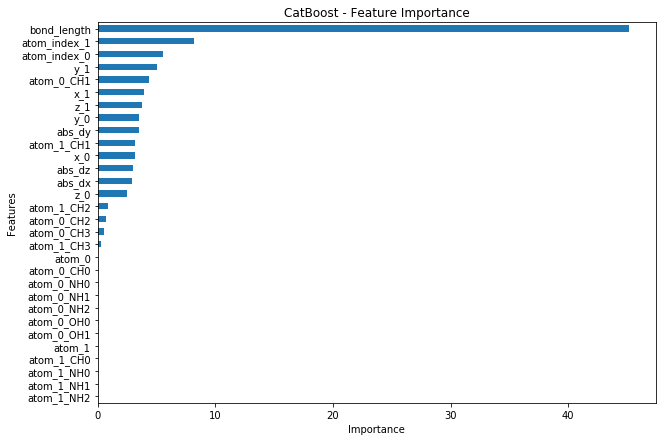

In [30]:
show_feature_importance(model, train_map_split[coupling_type][0].columns)

#### 1JHN

In [31]:
coupling_type = '1JHN'
model = model_map[coupling_type]
y_pred = model.predict(train_map_split[coupling_type][1])

In [32]:
show_scores(train_map_split[coupling_type][3], y_pred)

Variance_Score(cat_Regressor)	:0.9312257847210851
Mean_Absolute_Error(cat_Regressor)	:2.0250420043595763
Mean_Squared_Error(cat_Regressor)	:8.275231409666395
R2-Score(cat_Regressor)	:0.9312074900021637


In [ ]:
# no one-hot encoding 2000 iter
Variance_Score(cat_Regressor)	:0.9298085539454239
Mean_Absolute_Error(cat_Regressor)	:2.0511599010813986
Mean_Squared_Error(cat_Regressor)	:8.445888514171434
R2-Score(cat_Regressor)	:0.9297888069482795

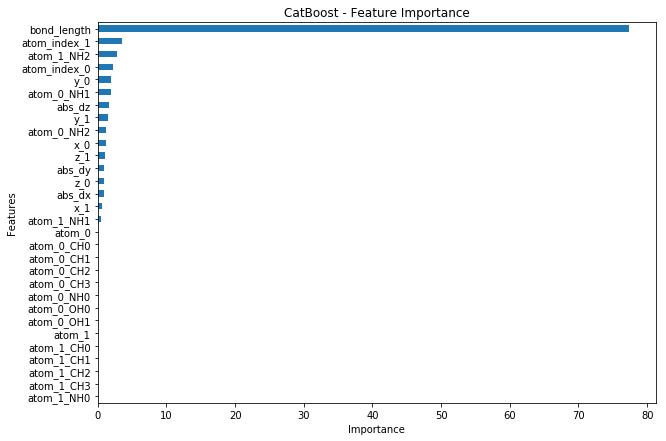

In [33]:
show_feature_importance(model, train_map_split[coupling_type][0].columns)

In [ ]:
May need below

In [ ]:
import pandas as pd

submission = pd.read_csv('./input/sample_submission.csv')
submission['scalar_coupling_constant'] = predictions
submission.to_csv('many_features_split_type_CAT.csv', index=False)

In [ ]:
import numpy as np

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                c_prec = df[col].apply(lambda x: np.finfo(x).precision).max()
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max and c_prec == np.finfo(np.float16).precision:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max and c_prec == np.finfo(np.float32).precision:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
                    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
def additional_features(df):
    df['molecule_couples'] = df.groupby('molecule_name')['id'].transform('count')
    df['molecule_dist_mean'] = df.groupby('molecule_name')['distance'].transform('mean')
    df['molecule_dist_min'] = df.groupby('molecule_name')['distance'].transform('min')
    df['molecule_dist_max'] = df.groupby('molecule_name')['distance'].transform('max')
    df['molecule_dist_std'] = df.groupby('molecule_name')['distance'].transform('std')
    df['atom_0_couples_count'] = df.groupby(['molecule_name', 'atom_index_0'])['id'].transform('count')
    df['atom_1_couples_count'] = df.groupby(['molecule_name', 'atom_index_1'])['id'].transform('count')

    num_cols = ['distance'] # 'dx', 'dy', 'dz'
    cat_cols = ['atom_index_0', 'atom_index_1']
    aggs = ['mean', 'std', 'max', 'min']
    for col in cat_cols:
        df[f'molecule_{col}_count'] = df.groupby('molecule_name')[col].transform('count')

    for cat_col in cat_cols:
        for num_col in num_cols:
            for agg in aggs:
                df[f'molecule_{cat_col}_{num_col}_{agg}'] = df.groupby(['molecule_name', cat_col])[num_col].transform(agg)
                df[f'molecule_{cat_col}_{num_col}_{agg}_diff'] = df[f'molecule_{cat_col}_{num_col}_{agg}'] - df[num_col]
                df[f'molecule_{cat_col}_{num_col}_{agg}_div'] = df[f'molecule_{cat_col}_{num_col}_{agg}'] / df[num_col]

    df = reduce_mem_usage(df)
    return df